# Project 1: SAT & ACT Analysis

## Problem Statement

***Background***

* Standardized testing is an important part of the college application process for many students looking to enter their desired undergraduate univeristy. 
* Test scores are used as indicators of academic ability and potential, alongside scholarship eligibility.
* The SAT and ACT tests are two kinds of standardized tests offered in the US.

***Objective of Study***

By analyzing test scores and participation rates from SAT and ACT tests taken in 2017 and 2018, we aim to make recommendations to the SAT College Board on ways to increase SAT participation rate for 3 selected states.

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import skewtest
from scipy.stats import skew
import plotly.graph_objects as go

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017=pd.read_csv('../data/sat_2017.csv')

In [3]:
act_2017=pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
sat_2017.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [5]:
act_2017.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [6]:
sat_2017.describe()

Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000

* 51 states participarted in the SAT 2017 test
* Mean score of 'Evidence-Based Reading and Writing' is slightly higher than 'Math'
* The lowest mean score for Math is only at 52. More investigation is needed to understand the odd outlier.  

In [7]:
act_2017.describe()

English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.525000
max    25.500000  25.300000  26.000000  24.900000

* 51 states participated in the ACT 2017 test
* ACT tests includes more subjects than the SAT
* There is an extra row that the SAT data did not contain: The 'National' row reflecting the national data
* It is interesting to note that the 'English' subject had the lowest mean score, while 'Reading' had the highest mean score. Both are language modules which we would expect to have close rankings.
* The lowest mean score of the Science test is 2.3, which is an odd outlier. More investigation is needed

#### 4a. Does the data look complete? 

In [8]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [9]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

* There are no empty values for every column in both datasets. The data looks complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

From outside research, we understand that possible scores for the two tests are as follows:
* SAT Subject: 200-800
* SAT Total Score: 400-1600
* ACT Subject & Composite: 1-36 (Composite Score is calculated as the average of the 4 subjects, rounded to the nearest integer) 

We shall check if all scores are within the possible ranges.

In [10]:
sat_2017[['Evidence-Based Reading and Writing','Math']]>800

Evidence-Based Reading and Writing   Math
0                                False  False
1                                False  False
2                                False  False
3                                False  False
4                                False  False
5                                False  False
6                                False  False
7                                False  False
8                                False  False
9                                False  False
10                               False  False
11                               False  False
12                               False  False
13                               False  False
14                               False  False
15                               False  False
16                               False  False
17                               False  False
18                               False  False
19                               False  False
20                               False  False
21                               False  False
22                               False  False
23                               False  False
24                               False  False
25                               False  False
26                               False  False
27                               False  False
28                               False  False
29                               False  False
30                               False  False
31                               False  False
32                               False  False
33                               False  False
34                               False  False
35                               False  False
36                               False  False
37                               False  False
38                               False  False
39                               False  False
40                               False  False
41                               False  False
42                               False  False
43                               False  False
44                               False  False
45                               False  False
46                               False  False
47                               False  False
48                               False  False
49                               False  False
50                               False  False

In [11]:
sat_2017[['Evidence-Based Reading and Writing','Math']]<200

Evidence-Based Reading and Writing   Math
0                                False  False
1                                False  False
2                                False  False
3                                False  False
4                                False  False
5                                False  False
6                                False  False
7                                False  False
8                                False  False
9                                False  False
10                               False  False
11                               False  False
12                               False  False
13                               False  False
14                               False  False
15                               False  False
16                               False  False
17                               False  False
18                               False  False
19                               False  False
20                               False   True
21                               False  False
22                               False  False
23                               False  False
24                               False  False
25                               False  False
26                               False  False
27                               False  False
28                               False  False
29                               False  False
30                               False  False
31                               False  False
32                               False  False
33                               False  False
34                               False  False
35                               False  False
36                               False  False
37                               False  False
38                               False  False
39                               False  False
40                               False  False
41                               False  False
42                               False  False
43                               False  False
44                               False  False
45                               False  False
46                               False  False
47                               False  False
48                               False  False
49                               False  False
50                               False  False

In [12]:
sat_2017[['Total']]>1600

Total
0   False
1   False
2   False
3   False
4   False
5   False
6   False
7   False
8   False
9   False
10  False
11  False
12  False
13  False
14  False
15  False
16  False
17  False
18  False
19  False
20  False
21  False
22  False
23  False
24  False
25  False
26  False
27  False
28  False
29  False
30  False
31  False
32  False
33  False
34  False
35  False
36  False
37  False
38  False
39  False
40  False
41  False
42  False
43  False
44  False
45  False
46  False
47  False
48  False
49  False
50  False

In [13]:
act_2017[['English','Math','Reading','Science']] >36 

English   Math  Reading  Science
0     False  False    False    False
1     False  False    False    False
2     False  False    False    False
3     False  False    False    False
4     False  False    False    False
5     False  False    False    False
6     False  False    False    False
7     False  False    False    False
8     False  False    False    False
9     False  False    False    False
10    False  False    False    False
11    False  False    False    False
12    False  False    False    False
13    False  False    False    False
14    False  False    False    False
15    False  False    False    False
16    False  False    False    False
17    False  False    False    False
18    False  False    False    False
19    False  False    False    False
20    False  False    False    False
21    False  False    False    False
22    False  False    False    False
23    False  False    False    False
24    False  False    False    False
25    False  False    False    False
26    False  False    False    False
27    False  False    False    False
28    False  False    False    False
29    False  False    False    False
30    False  False    False    False
31    False  False    False    False
32    False  False    False    False
33    False  False    False    False
34    False  False    False    False
35    False  False    False    False
36    False  False    False    False
37    False  False    False    False
38    False  False    False    False
39    False  False    False    False
40    False  False    False    False
41    False  False    False    False
42    False  False    False    False
43    False  False    False    False
44    False  False    False    False
45    False  False    False    False
46    False  False    False    False
47    False  False    False    False
48    False  False    False    False
49    False  False    False    False
50    False  False    False    False
51    False  False    False    False

In [14]:
act_2017[['English','Math','Reading','Science']] <1 

English   Math  Reading  Science
0     False  False    False    False
1     False  False    False    False
2     False  False    False    False
3     False  False    False    False
4     False  False    False    False
5     False  False    False    False
6     False  False    False    False
7     False  False    False    False
8     False  False    False    False
9     False  False    False    False
10    False  False    False    False
11    False  False    False    False
12    False  False    False    False
13    False  False    False    False
14    False  False    False    False
15    False  False    False    False
16    False  False    False    False
17    False  False    False    False
18    False  False    False    False
19    False  False    False    False
20    False  False    False    False
21    False  False    False    False
22    False  False    False    False
23    False  False    False    False
24    False  False    False    False
25    False  False    False    False
26    False  False    False    False
27    False  False    False    False
28    False  False    False    False
29    False  False    False    False
30    False  False    False    False
31    False  False    False    False
32    False  False    False    False
33    False  False    False    False
34    False  False    False    False
35    False  False    False    False
36    False  False    False    False
37    False  False    False    False
38    False  False    False    False
39    False  False    False    False
40    False  False    False    False
41    False  False    False    False
42    False  False    False    False
43    False  False    False    False
44    False  False    False    False
45    False  False    False    False
46    False  False    False    False
47    False  False    False    False
48    False  False    False    False
49    False  False    False    False
50    False  False    False    False
51    False  False    False    False

* Consistent with the findings from above, there is an SAT Math Score that fell below a possible score. 
* All other scores from the SAT appear fine.
* Similarily, while all ACT Science scoress fell wihtin the possible range, we should further research on it to ensure no recording errors. 

#### 4c. Fix any errors you identified

In [15]:
act_2017.loc[act_2017['Science']== 2.3]

State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2      2.3      23.6

In [16]:
sat_2017.loc[sat_2017['Math']== 52]

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060

From research, we found out that 
* Maryland's 2017 SAT Math Score should be 524 through <a href="http://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf" target="_blank">this link</a>.
* Maryland's 2017 ACT Science Score should be 23.2 through <a href="https://nces.ed.gov/programs/digest/d17/tables/dt17_226.60.asp" target="_blank">this link</a>. 

In [17]:
#assigning the new ACT Science score to Maryland
act_2017.at[21,'Science'] = 23.2

In [18]:
#confirming if dataset is updated
act_2017.loc[act_2017['State']== "Maryland"]

State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2     23.2      23.6

In [19]:
#assigning the new SAT Math score to Maryland
sat_2017.at[20, 'Math'] = 524

In [20]:
#confirming if dataset is updated
sat_2017.loc[sat_2017['State']== "Maryland"]

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536   524   1060

#### 5. What are your data types? 
Display the data types of each feature. 

In [21]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [22]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

* SAT 2017 and ACT 2017 Participation Rate needs to be converted to a float so we can compute its results
* ACT 2017 Composite Score should be an integer datatype. Fractions less than one-half are rounded down; Fractions one-half or more are rounded up, as stated through <a href="http://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html#:~:text=Your%20Composite%20score%20and%20each,or%20more%20are%20rounded%20up." target="_blank">this link</a>.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [23]:
#Creating a function to convert a string to a float
def percentage_to_numeric(string):
    return float(string.replace('%',''))/100

In [24]:
#Mapping function to SAT Participartion column
sat_2017['Participation']=sat_2017['Participation'].apply(percentage_to_numeric)

In [25]:
#Confirming datatype conversion is successful
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [26]:
#Mapping function to ACT Participartion column
act_2017['Participation']=act_2017['Participation'].apply(percentage_to_numeric)

In [27]:
#Confirming datatype conversion is successful
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


In [28]:
#Investigating why ACT Composite column is registered as object.
act_2017['Composite'].unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [29]:
#Creating a function to remove 'x' from the dataset and ensuring results are in float
def objectx_string_to_numeric(string):
    if string[-1] == 'x':
        result = string[:-1]
        return float(result)
    else:
        return float(string)

In [30]:
act_2017['Composite']=act_2017['Composite'].apply(objectx_string_to_numeric)

In [31]:
#Creating a function to map ACT composite scoresto the nearest integer

def act_round_number(n):
    '''
    Returns the Composite score rounded to the nearest whole number. 
    Fractions less than one-half are rounded down; 
    fractions one-half or more are rounded up.
    '''
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

In [32]:
act_2017['Composite']=act_2017['Composite'].apply(act_round_number)

In [33]:
#Takimg a sneak peek to ensure succesful rounding up
act_2017['Composite'].head()

0    21
1    19
2    20
3    20
4    19
Name: Composite, dtype: int64

In [34]:
#Confirming ACT datatypes
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite          int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [35]:
sat_2017.rename(columns={
    'State':'state',
    'Participation':'sat_participation_17',
    'Evidence-Based Reading and Writing':'sat_reading_writing_17',
    'Math':'sat_math_17',
    'Total':'sat_total_17'
},inplace=True)

act_2017.rename(columns={
    'State':'state',
    'Participation':'act_participation_17',
    'English':'act_english_17',
    'Math':'act_math_17',
    'Reading':'act_reading_17',
    'Science':'act_science_17',
    'Composite':'act_composite_17'
},inplace=True)

In [36]:
#Confirming successful renaming
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   sat_participation_17    51 non-null     float64
 2   sat_reading_writing_17  51 non-null     int64  
 3   sat_math_17             51 non-null     int64  
 4   sat_total_17            51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [37]:
#Confirming successful renaming
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 52 non-null     object 
 1   act_participation_17  52 non-null     float64
 2   act_english_17        52 non-null     float64
 3   act_math_17           52 non-null     float64
 4   act_reading_17        52 non-null     float64
 5   act_science_17        52 non-null     float64
 6   act_composite_17      52 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


## Data Dictionary for 2017 SAT & ACT Dataframe
Link to sources:
- [ACT 2017](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)
- [SAT 2017](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)

|Feature|Data Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT 2017,<br>ACT 2017|US State|
|**sat_participation_17**|*float*|SAT 2017|State SAT Participation Rate in 2017(%)|
|**sat_reading_writing_17**|*integer*|SAT 2017|State mean score for 2017 SAT Evidence-based Reading and Writing section.<br>Maximum score = 800, Minimum score = 200| 
|**sat_math_17**|*integer*|SAT 2017|State mean score for 2017 SAT Math section.<br>Maximum score = 800, Minimum score = 200| 
|**sat_total_17**|*integer*|SAT 2017|State mean score for 2017 Total SAT score.<br>Sum of 'Evidence-based Reading and Writing' and 'Math' section.<br>Maximum score = 1600, Minimum score = 400| 
|**act_participation_17**|*float*|ACT 2017|State ACT Participation Rate in 2017(%)| 
|**act_english_17**|*float*|ACT 2017|State mean score for 2017 ACT English.<br>Maximum score = 36, Minimum score = 1| 
|**act_math_17**|*float*|ACT 2017|State mean score for 2017 ACT Math.<br>Maximum score = 36, Minimum score = 1| 
|**act_reading_17**|*float*|ACT 2017|State mean score for 2017 ACT Reading.<br>Maximum score = 36, Minimum score = 1| 
|**act_science_17**|*float*|ACT 2017|State mean score for 2017 ACT Science.<br>Maximum score = 36, Minimum score = 1| 
|**act_composite_17**|*integer*|ACT 2017|State mean score for 2017 ACT Composite Score.<br>Average of the four test scores, rounded to the nearest whole number.<br>Maximum score = 36, Minimum score = 1| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [38]:
#printing out a snapshot of the dataframe for review
act_2017.head()

state  act_participation_17  act_english_17  act_math_17  \
0  National                  0.60            20.3         20.7   
1   Alabama                  1.00            18.9         18.4   
2    Alaska                  0.65            18.7         19.8   
3   Arizona                  0.62            18.6         19.8   
4  Arkansas                  1.00            18.9         19.0   

   act_reading_17  act_science_17  act_composite_17  
0            21.4            21.0                21  
1            19.7            19.4                19  
2            20.4            19.9                20  
3            20.1            19.8                20  
4            19.7            19.5                19

In [39]:
#dropping the National row
act_2017.drop(0,inplace=True)

In [40]:
#Confirming successful row drop
act_2017.head()

state  act_participation_17  act_english_17  act_math_17  \
1     Alabama                  1.00            18.9         18.4   
2      Alaska                  0.65            18.7         19.8   
3     Arizona                  0.62            18.6         19.8   
4    Arkansas                  1.00            18.9         19.0   
5  California                  0.31            22.5         22.7   

   act_reading_17  act_science_17  act_composite_17  
1            19.7            19.4                19  
2            20.4            19.9                20  
3            20.1            19.8                20  
4            19.7            19.5                19  
5            23.1            22.2                23

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [41]:
sat_act_2017 = sat_2017.merge(act_2017,how="outer",on=['state'])

In [42]:
#Confirming updated dataframe
sat_act_2017.head()

state  sat_participation_17  sat_reading_writing_17  sat_math_17  \
0     Alabama                  0.05                     593          572   
1      Alaska                  0.38                     547          533   
2     Arizona                  0.30                     563          553   
3    Arkansas                  0.03                     614          594   
4  California                  0.53                     531          524   

   sat_total_17  act_participation_17  act_english_17  act_math_17  \
0          1165                  1.00            18.9         18.4   
1          1080                  0.65            18.7         19.8   
2          1116                  0.62            18.6         19.8   
3          1208                  1.00            18.9         19.0   
4          1055                  0.31            22.5         22.7   

   act_reading_17  act_science_17  act_composite_17  
0            19.7            19.4                19  
1            20.4            19.9                20  
2            20.1            19.8                20  
3            19.7            19.5                19  
4            23.1            22.2                23

In [43]:
sat_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   sat_participation_17    51 non-null     float64
 2   sat_reading_writing_17  51 non-null     int64  
 3   sat_math_17             51 non-null     int64  
 4   sat_total_17            51 non-null     int64  
 5   act_participation_17    51 non-null     float64
 6   act_english_17          51 non-null     float64
 7   act_math_17             51 non-null     float64
 8   act_reading_17          51 non-null     float64
 9   act_science_17          51 non-null     float64
 10  act_composite_17        51 non-null     int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [44]:
sat_act_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

Importing the csv files

In [45]:
sat_2018=pd.read_csv('../data/sat_2018.csv')

In [46]:
act_2018=pd.read_csv('../data/act_2018_updated.csv')

Taking a sneak peek into the files

In [47]:
sat_2018.head()

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

In [48]:
act_2018.head()

State  Percentage of Students Tested  Average Composite Score  \
0     Alabama                            100                     19.1   
1      Alaska                             33                     20.8   
2     Arizona                             66                     19.2   
3    Arkansas                            100                     19.4   
4  California                             27                     22.7   

   Average English Score  Average Math Score  Average Reading Score  \
0                   18.9                18.3                   19.6   
1                   19.8                20.6                   21.6   
2                   18.2                19.4                   19.5   
3                   19.1                18.9                   19.7   
4                   22.5                22.5                   23.0   

   Average Science Score  
0                   19.0  
1                   20.7  
2                   19.2  
3                   19.4  
4                   22.1

In [49]:
#printing out the datatypes for SAT 2018 dataframe
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [50]:
#printing out the datatypes for ACT 2018 dataframe
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


Looking at the dataset, here is what we need to do:
- Task 1: For ACT composite score, return an integer rounded to the nearest whole number
- Task 2: ACT participation rate should be a float and returned with a 2decimal point
- Task 3: For SAT participation score, value has to return a float
- Task 4: Change the column names of both datasets to a more descriptive name
- Task 5: Updating our Data Library

Task 1: For ACT composite score, value has to return an integer, rounded to the nearest whole number

In [51]:
#Using previously defined function to map to nearest whole number
act_2018['Average Composite Score']=act_2018['Average Composite Score'].apply(act_round_number)

In [52]:
#printing out a snapsnot
act_2018['Average Composite Score'].head(6)

0    19
1    21
2    19
3    19
4    23
5    24
Name: Average Composite Score, dtype: int64

Task 2: ACT participation rate should be a float

In [53]:
#using list comprehension to map to a float
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].apply(lambda x: float(x)/100)

In [54]:
#printing a snapshot to confirm
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-null     int64  
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


Task 3: For SAT participation score, value has to return a float

In [55]:
#Using previous defined function 
sat_2018['Participation']=sat_2018['Participation'].apply(percentage_to_numeric)

In [56]:
#printing a snapshot to confirm
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


Task 4: Change the column names of both datasets to a more descriptive name

In [57]:
sat_2018.rename(columns={
    'State':'state',
    'Participation':'sat_participation_18',
    'Evidence-Based Reading and Writing':'sat_reading_writing_18',
    'Math':'sat_math_18',
    'Total':'sat_total_18'
},inplace=True)

act_2018.rename(columns={
    'State':'state',
    'Percentage of Students Tested':'act_participation_18',
    'Average English Score':'act_english_18',
    'Average Math Score':'act_math_18',
    'Average Reading Score':'act_reading_18',
    'Average Science Score':'act_science_18',
    'Average Composite Score':'act_composite_18'
},inplace=True)

In [58]:
#confirming successful renaming
sat_2018.head(0)

Empty DataFrame
Columns: [state, sat_participation_18, sat_reading_writing_18, sat_math_18, sat_total_18]
Index: []

In [59]:
#confirming successful renaming
act_2018.head(0)

Empty DataFrame
Columns: [state, act_participation_18, act_composite_18, act_english_18, act_math_18, act_reading_18, act_science_18]
Index: []

Task 5: Updating our Data Library

## Data Dictionary for 2017-2018 SAT & ACT Scores

|Feature|Data Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT 2017<br>SAT 2018<br>ACT 2017<br>ACT 2018|US State|
|**sat_participation_17**|*float*|SAT 2017|State SAT 2017 Participation Rate(%)|
|**sat_participation_18**|*float*|SAT 2018|State SAT 2018 Participation Rate(%)|
|**sat_reading_writing_17**|*integer*|SAT 2017|State mean score for 2017 SAT Evidence-based Reading and Writing section.<br>Maximum score = 800, Minimum score = 200| 
|**sat_reading_writing_18**|*integer*|SAT 2018|State mean score for 2018 SAT Evidence-based Reading and Writing section.<br>Maximum score = 800, Minimum score = 200| 
|**sat_math_17**|*integer*|SAT 2017|State mean score for 2017 SAT Math section.<br>Maximum score = 800, Minimum score = 200| 
|**sat_math_18**|*integer*|SAT 2087|State mean score for 2018 SAT Math section.<br>Maximum score = 800, Minimum score = 200| 
|**sat_total_17**|*integer*|SAT 2017|State mean score for 2017 Total SAT score.<br>Sum of 'Evidence-based Reading and Writing' and 'Math' section.<br>Maximum score = 1600, Minimum score = 400| 
|**sat_total_18**|*integer*|SAT 2018|State mean score for 2018 Total SAT score.<br>Sum of 'Evidence-based Reading and Writing' and 'Math' section.<br>Maximum score = 1600, Minimum score = 400| 
|**act_participation_17**|*float*|ACT 2017|State ACT Participation Rate in 2017(%)| 
|**act_participation_18**|*float*|ACT 2018|State ACT Participation Rate in 2018(%)| 
|**act_english_17**|*float*|ACT 2017|State mean score for 2017 ACT English.<br>Maximum score = 36, Minimum score = 1|
|**act_english_18**|*float*|ACT 2018|State mean score for 2018 ACT English.<br>Maximum score = 36, Minimum score = 1| 
|**act_math_17**|*float*|ACT 2017|State mean score for 2017 ACT Math.<br>Maximum score = 36, Minimum score = 1|
|**act_math_18**|*float*|ACT 2018|State mean score for 2018 ACT Math.<br>Maximum score = 36, Minimum score = 1|
|**act_reading_17**|*float*|ACT 2017|State mean score for 2017 ACT Reading.<br>Maximum score = 36, Minimum score = 1| 
|**act_reading_18**|*float*|ACT 2018|State mean score for 2018 ACT Reading.<br>Maximum score = 36, Minimum score = 1|
|**act_science_17**|*float*|ACT 2017|State mean score for 2017 ACT Science.<br>Maximum score = 36, Minimum score = 1| 
|**act_science_18**|*float*|ACT 2018|State mean score for 2018 ACT Science.<br>Maximum score = 36, Minimum score = 1| 
|**act_composite_17**|*integer*|ACT 2017|State mean score for 2017 ACT Composite Score.<br>Average of the four test scores, rounded to the nearest whole number.<br>Maximum score = 36, Minimum score = 1| 
|**act_composite_18**|*integer*|ACT 2018|State mean score for 2018 ACT Composite Score.<br>Average of the four test scores, rounded to the nearest whole number.<br>Maximum score = 36, Minimum score = 1|

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [60]:
#merging both ACT and SAT 2018 dataframe together
final_2018 = sat_2018.merge(act_2018,how="outer",on=['state'])
final_2018.head(3)

state  sat_participation_18  sat_reading_writing_18  sat_math_18  \
0  Alabama                  0.06                     595          571   
1   Alaska                  0.43                     562          544   
2  Arizona                  0.29                     577          572   

   sat_total_18  act_participation_18  act_composite_18  act_english_18  \
0          1166                  1.00                19            18.9   
1          1106                  0.33                21            19.8   
2          1149                  0.66                19            18.2   

   act_math_18  act_reading_18  act_science_18  
0         18.3            19.6            19.0  
1         20.6            21.6            20.7  
2         19.4            19.5            19.2

In [61]:
#merging both 2017 and 2018 combined ACT and SAT dataframe together
final_2017_2018 = final_2018.merge(sat_act_2017,how="outer",on=['state'])
final_2017_2018.head(3)

state  sat_participation_18  sat_reading_writing_18  sat_math_18  \
0  Alabama                  0.06                     595          571   
1   Alaska                  0.43                     562          544   
2  Arizona                  0.29                     577          572   

   sat_total_18  act_participation_18  act_composite_18  act_english_18  \
0          1166                  1.00                19            18.9   
1          1106                  0.33                21            19.8   
2          1149                  0.66                19            18.2   

   act_math_18  act_reading_18  ...  sat_participation_17  \
0         18.3            19.6  ...                  0.05   
1         20.6            21.6  ...                  0.38   
2         19.4            19.5  ...                  0.30   

   sat_reading_writing_17  sat_math_17  sat_total_17  act_participation_17  \
0                     593          572          1165                  1.00   
1                     547          533          1080                  0.65   
2                     563          553          1116                  0.62   

   act_english_17  act_math_17  act_reading_17  act_science_17  \
0            18.9         18.4            19.7            19.4   
1            18.7         19.8            20.4            19.9   
2            18.6         19.8            20.1            19.8   

   act_composite_17  
0                19  
1                20  
2                20  

[3 rows x 21 columns]

In [62]:
#Exporting to final.csv
final_2017_2018.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [63]:
final_2017_2018.describe().T

count         mean        std     min       25%  \
sat_participation_18     51.0     0.457451   0.373143    0.02     0.045   
sat_reading_writing_18   51.0   563.686275  47.502627  480.00   534.500   
sat_math_18              51.0   556.235294  47.772623  480.00   522.500   
sat_total_18             51.0  1120.019608  94.155083  977.00  1057.500   
act_participation_18     51.0     0.616471   0.340810    0.07     0.285   
act_composite_18         51.0    21.509804   2.212443   18.00    20.000   
act_english_18           51.0    20.988235   2.446356   16.60    19.100   
act_math_18              51.0    21.125490   2.035765   17.80    19.400   
act_reading_18           51.0    22.015686   2.167245   18.00    20.450   
act_science_18           51.0    21.345098   1.870114   17.90    19.850   
sat_participation_17     51.0     0.398039   0.352766    0.02     0.040   
sat_reading_writing_17   51.0   569.117647  45.666901  482.00   533.500   
sat_math_17              51.0   556.882353  47.121395  468.00   523.500   
sat_total_17             51.0  1126.098039  92.494812  950.00  1055.500   
act_participation_17     51.0     0.652549   0.321408    0.08     0.310   
act_english_17           51.0    20.931373   2.353677   16.30    19.000   
act_math_17              51.0    21.182353   1.981989   18.00    19.400   
act_reading_17           51.0    22.013725   2.067271   18.10    20.450   
act_science_17           51.0    21.450980   1.739353   18.20    19.950   
act_composite_17         51.0    21.549020   2.032867   18.00    20.000   

                            50%       75%     max  
sat_participation_18       0.52     0.775     1.0  
sat_reading_writing_18   552.00   610.500   643.0  
sat_math_18              544.00   593.500   655.0  
sat_total_18            1098.00  1204.000  1298.0  
act_participation_18       0.66     1.000     1.0  
act_composite_18          21.00    24.000    26.0  
act_english_18            20.20    23.700    26.0  
act_math_18               20.70    23.150    25.2  
act_reading_18            21.60    24.100    26.1  
act_science_18            21.10    23.050    24.9  
sat_participation_17       0.38     0.660     1.0  
sat_reading_writing_17   559.00   613.000   644.0  
sat_math_17              548.00   599.000   651.0  
sat_total_17            1107.00  1212.000  1295.0  
act_participation_17       0.69     1.000     1.0  
act_english_17            20.70    23.300    25.5  
act_math_17               20.90    23.100    25.3  
act_reading_17            21.80    24.150    26.0  
act_science_17            21.30    23.200    24.9  
act_composite_17          21.00    24.000    26.0

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [64]:
def standard_deviation(col):
    sum_values = 0
    mean = sum(col)/ len(col)
    for value in col:
        # Calculate sum of squared distance from each data point to the mean
        sum_values += (value - mean) ** 2
    # The index is counted as an extra row, hence len - 1
    return (sum_values/(len(col) - 1)) ** 0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [65]:
#printing out a snapshot
final_2017_2018.head()

state  sat_participation_18  sat_reading_writing_18  sat_math_18  \
0     Alabama                  0.06                     595          571   
1      Alaska                  0.43                     562          544   
2     Arizona                  0.29                     577          572   
3    Arkansas                  0.05                     592          576   
4  California                  0.60                     540          536   

   sat_total_18  act_participation_18  act_composite_18  act_english_18  \
0          1166                  1.00                19            18.9   
1          1106                  0.33                21            19.8   
2          1149                  0.66                19            18.2   
3          1169                  1.00                19            19.1   
4          1076                  0.27                23            22.5   

   act_math_18  act_reading_18  ...  sat_participation_17  \
0         18.3            19.6  ...                  0.05   
1         20.6            21.6  ...                  0.38   
2         19.4            19.5  ...                  0.30   
3         18.9            19.7  ...                  0.03   
4         22.5            23.0  ...                  0.53   

   sat_reading_writing_17  sat_math_17  sat_total_17  act_participation_17  \
0                     593          572          1165                  1.00   
1                     547          533          1080                  0.65   
2                     563          553          1116                  0.62   
3                     614          594          1208                  1.00   
4                     531          524          1055                  0.31   

   act_english_17  act_math_17  act_reading_17  act_science_17  \
0            18.9         18.4            19.7            19.4   
1            18.7         19.8            20.4            19.9   
2            18.6         19.8            20.1            19.8   
3            18.9         19.0            19.7            19.5   
4            22.5         22.7            23.1            22.2   

   act_composite_17  
0                19  
1                20  
2                20  
3                19  
4                23  

[5 rows x 21 columns]

In [66]:
#Using a dictionary comprehension
generated_dict = {i:standard_deviation(final_2017_2018[i]) for i in final_2017_2018.columns if i != 'state'}
generated_dict

{'sat_participation_18': 0.37314256330391965,
 'sat_reading_writing_18': 47.50262737831599,
 'sat_math_18': 47.77262322095955,
 'sat_total_18': 94.15508275097599,
 'act_participation_18': 0.3408097623567245,
 'act_composite_18': 2.2124425327642556,
 'act_english_18': 2.4463562339793055,
 'act_math_18': 2.035764538177723,
 'act_reading_18': 2.1672445684804105,
 'act_science_18': 1.8701137639716146,
 'sat_participation_17': 0.35276632270013036,
 'sat_reading_writing_17': 45.66690138768932,
 'sat_math_17': 47.12139516560329,
 'sat_total_17': 92.49481172519046,
 'act_participation_17': 0.32140842015886834,
 'act_english_17': 2.35367713980303,
 'act_math_17': 1.9819894936505533,
 'act_reading_17': 2.0672706264873146,
 'act_science_17': 1.7393530462812443,
 'act_composite_17': 2.0328671918273074}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

* No, it does not match up. 
* Pandas uses the unbiased estimator (N-1 in the denominator), whereas Numpy by default does not.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### Finding out the highest and lowest participation rates for each test

States with highest participation rates for the 2017 SAT

In [67]:
sat_2017.sort_values(by='sat_participation_17',ascending=False).head(3)

state  sat_participation_17  sat_reading_writing_17  \
8   District of Columbia                   1.0                     482   
22              Michigan                   1.0                     509   
6            Connecticut                   1.0                     530   

    sat_math_17  sat_total_17  
8           468           950  
22          495          1005  
6           512          1041

In [68]:
#Finding all states that share the highest participation rates
sat_2017.loc[sat_2017['sat_participation_17']==1.0,['state']]

state
6            Connecticut
7               Delaware
8   District of Columbia
22              Michigan

* We find out there are several cities that have 100% participation rate. Thus, as 100% is the maximum score, we filter out the states that share this result
* There are 4 states (Connecticut, Delaware, District of Columbia and Michigan)

States with lowest participation rates for the 2017 SAT

In [69]:
sat_2017.sort_values(by='sat_participation_17',ascending=True).head(3)

state  sat_participation_17  sat_reading_writing_17  sat_math_17  \
34  North Dakota                  0.02                     635          621   
24   Mississippi                  0.02                     634          607   
15          Iowa                  0.02                     641          635   

    sat_total_17  
34          1256  
24          1242  
15          1275

In [70]:
#Printing out all states that share the lowest participation rates
sat_2017.loc[sat_2017['sat_participation_17']==0.02,['state']]

state
15          Iowa
24   Mississippi
34  North Dakota

* Similarily, we see that there are several states that share the lowest value
* Upon filtering the participation rate, we find out that these states are Iowa, Mississippi and North Dakota

States with highest participation rates for the 2017 ACT

In [71]:
act_2017.sort_values(by='act_participation_17',ascending=False).head(3)

state  act_participation_17  act_english_17  act_math_17  \
1     Alabama                   1.0            18.9         18.4   
18   Kentucky                   1.0            19.6         19.4   
50  Wisconsin                   1.0            19.7         20.4   

    act_reading_17  act_science_17  act_composite_17  
1             19.7            19.4                19  
18            20.5            20.1                20  
50            20.6            20.9                21

In [72]:
#Finding all states that share the highest participation rates
act_2017.loc[act_2017['act_participation_17']==1.0,['state']]

state
1          Alabama
4         Arkansas
6         Colorado
18        Kentucky
19       Louisiana
24       Minnesota
25     Mississippi
26        Missouri
27         Montana
29          Nevada
34  North Carolina
37        Oklahoma
41  South Carolina
43       Tennessee
45            Utah
50       Wisconsin
51         Wyoming

* Similar to the SAT 2017 performance, several states share the highest participation rate
* Unlike SAT, the 17 states who have 100% participation rate. This is >4x times more.
* We also note that none of the states who achieved highest participation rate in SAT, achieved the highest participation rate in ACT too
* It is interesting to point out that Mississippi had the lowest participation rate in SAT, but had the highest in ACT

States with lowest participation rates for the 2017 ACT

In [73]:
act_2017.sort_values(by='act_participation_17',ascending=True).head(3)

state  act_participation_17  act_english_17  act_math_17  \
20          Maine                  0.08            24.2         24.0   
30  New Hampshire                  0.18            25.4         25.1   
8        Delaware                  0.18            24.1         23.4   

    act_reading_17  act_science_17  act_composite_17  
20            24.8            23.7                24  
30            26.0            24.9                26  
8             24.8            23.6                24

* Maine has the lowest score. There are no other cities that share the same score as Maine. 

States with the highest participation for SAT 2018

In [74]:
sat_2018.sort_values(by='sat_participation_18',ascending=False).head(3)

state  sat_participation_18  sat_reading_writing_18  sat_math_18  \
5     Colorado                   1.0                     519          506   
6  Connecticut                   1.0                     535          519   
7     Delaware                   1.0                     505          492   

   sat_total_18  
5          1025  
6          1053  
7           998

In [75]:
sat_2018.loc[sat_2018['sat_participation_18']==1.0,['state']]

state
5      Colorado
6   Connecticut
7      Delaware
12        Idaho
22     Michigan

* Several states that have the highest participation rates in SAT 2018
* Compared to the previous year, SAT 2018 had 1 more state that share the highest participation rate
* Consistent with last year, Connecticut, Delaware and Michigan achieved the highest rate again

States with the lowest participation for SAT 2018

In [76]:
sat_2018.sort_values(by='sat_participation_18',ascending=True).head(3)

state  sat_participation_18  sat_reading_writing_18  sat_math_18  \
34  North Dakota                  0.02                     640          643   
50       Wyoming                  0.03                     633          625   
41  South Dakota                  0.03                     622          618   

    sat_total_18  
34          1283  
50          1257  
41          1240

* North Dakota had the lowest participation rate in 2018 (as well as 2017) for the SAT

States with the highest participation for ACT 2018

In [77]:
act_2018.sort_values(by='act_participation_18',ascending=False).head(3)

state  act_participation_18  act_composite_18  act_english_18  \
0     Alabama                   1.0                19            18.9   
17   Kentucky                   1.0                20            19.9   
49  Wisconsin                   1.0                21            19.8   

    act_math_18  act_reading_18  act_science_18  
0          18.3            19.6            19.0  
17         19.7            20.8            20.1  
49         20.3            20.6            20.8

In [78]:
act_2018.loc[act_2018['act_participation_18']==1.0,['state']]

state
0          Alabama
3         Arkansas
17        Kentucky
18       Louisiana
24     Mississippi
25        Missouri
26         Montana
27        Nebraska
28          Nevada
33  North Carolina
35            Ohio
36        Oklahoma
40  South Carolina
42       Tennessee
44            Utah
49       Wisconsin
50         Wyoming

* ACT 2018 saw 17 states (same count as previous year) sharing the highest participartion rate
* Most of the states who achieved highest participation in 2017, shared the highest participation rate again in 2018
* Colorado dropped out of top participating city in ACT 2018, but made it to one of the top participarting city for SAT 2018

States with the lowest participation rate in ACT 2018

In [79]:
act_2018.sort_values(by='act_participation_18',ascending=True).head(3)

state  act_participation_18  act_composite_18  act_english_18  \
19          Maine                  0.07                24            23.8   
39   Rhode Island                  0.15                24            24.4   
29  New Hampshire                  0.16                25            25.1   

    act_math_18  act_reading_18  act_science_18  
19         23.6            24.7            23.4  
39         23.6            25.0            23.5  
29         24.7            25.6            24.4

* Maine continued to achieve the lowest participation rate, but notably at a slightly higher rate

#### Finding out the highest and lowest mean total/composite scores for each test

State with the highest mean score for SAT 2018: Minnesota (1298)

In [80]:
sat_2018.sort_values(by='sat_total_18',ascending=False)[['state','sat_total_18']].head(3)

state  sat_total_18
23     Minnesota          1298
49     Wisconsin          1294
34  North Dakota          1283

State with the lowest mean score for SAT 2018: District of Columbia (977)

In [81]:
sat_2018.sort_values(by='sat_total_18',ascending=True)[['state','sat_total_18']].head(3)

state  sat_total_18
8   District of Columbia           977
7               Delaware           998
48         West Virginia           999

State with the highest mean score for ACT 2018: Massachusetts and Connecticut (26)

In [82]:
act_2018.sort_values(by='act_composite_18',ascending=False)[['state','act_composite_18']].head(3)

state  act_composite_18
21  Massachusetts                26
6     Connecticut                26
29  New Hampshire                25

State with the lowest mean score for ACT 2018: Nevada and South Carolina(18)

In [83]:
act_2018.sort_values(by='act_composite_18',ascending=True)[['state','act_composite_18']].head(3)

state  act_composite_18
28          Nevada                18
40  South Carolina                18
0          Alabama                19

State with the highest mean score for SAT 2017: Minnesota(1295)

In [84]:
sat_2017.sort_values(by='sat_total_17',ascending=False)[['state','sat_total_17']].head(3)

state  sat_total_17
23  Minnesota          1295
49  Wisconsin          1291
15       Iowa          1275

State with the lowest mean score for SAT 2017: District of Columbia(950)

In [85]:
sat_2017.sort_values(by='sat_total_17',ascending=True)[['state','sat_total_17']].head(3)

state  sat_total_17
8   District of Columbia           950
7               Delaware           996
12                 Idaho          1005

State with the highest mean score for ACT 2017: New Hampshire (26)

In [86]:
act_2017.sort_values(by='act_composite_17',ascending=False)[['state','act_composite_17']].head(3)

state  act_composite_17
30  New Hampshire                26
22  Massachusetts                25
7     Connecticut                25

State with the lowest mean score for ACT 2017: Nevada(18)

In [87]:
act_2017.sort_values(by='act_composite_17',ascending=True)[['state','act_composite_17']].head(3)

state  act_composite_17
29    Nevada                18
1    Alabama                19
4   Arkansas                19

Based solely on the extremes, we can notice certain trends:

States who tend to achieve the lowest/highest score for a type of test, maintains the trend to 2018.
- Minnesota continued to achieve the highest for SAT 2017 and 2018
- Nevada continued to achieve the lowest for ACT 2017 and 2018
- District of Columbia continued to achieve the lowest for SAT 2017 and 2018


Specific to the ACT test only, states who achieved the lowest composite score is among the highest participating state

- ACT 2017: Nevada
- ACT 2018: Nevada and South Carolina

#### Do any states with 100% participation on a given test have a rate change year-to-year?

Calculating the ACT participation change and assigning to a new column

In [88]:
final_2017_2018['act_partchange_100']=final_2017_2018['act_participation_18'] - final_2017_2018['act_participation_17']

In [89]:
final_2017_2018[['state','act_participation_18','act_participation_17','act_partchange_100']][(final_2017_2018['act_participation_18'] == 1.0) | (final_2017_2018['act_participation_17'] == 1.0)]  

state  act_participation_18  act_participation_17  \
0          Alabama                  1.00                  1.00   
3         Arkansas                  1.00                  1.00   
5         Colorado                  0.30                  1.00   
17        Kentucky                  1.00                  1.00   
18       Louisiana                  1.00                  1.00   
23       Minnesota                  0.99                  1.00   
24     Mississippi                  1.00                  1.00   
25        Missouri                  1.00                  1.00   
26         Montana                  1.00                  1.00   
27        Nebraska                  1.00                  0.84   
28          Nevada                  1.00                  1.00   
33  North Carolina                  1.00                  1.00   
35        Oklahoma                  1.00                  1.00   
36            Ohio                  1.00                  0.75   
40  South Carolina                  1.00                  1.00   
42       Tennessee                  1.00                  1.00   
44            Utah                  1.00                  1.00   
49       Wisconsin                  1.00                  1.00   
50         Wyoming                  1.00                  1.00   

    act_partchange_100  
0                 0.00  
3                 0.00  
5                -0.70  
17                0.00  
18                0.00  
23               -0.01  
24                0.00  
25                0.00  
26                0.00  
27                0.16  
28                0.00  
33                0.00  
35                0.00  
36                0.25  
40                0.00  
42                0.00  
44                0.00  
49                0.00  
50                0.00

* Colorado's change in participation is huge for ACT!

Calculating the SAT particpation change and assigning to a new column

In [90]:
final_2017_2018['sat_partchange_100']=final_2017_2018['sat_participation_18'] - final_2017_2018['sat_participation_17']

In [91]:
final_2017_2018[['state','sat_participation_18','sat_participation_17','sat_partchange_100']][(final_2017_2018['sat_participation_18'] == 1.0) | (final_2017_2018['sat_participation_17'] == 1.0)]  

state  sat_participation_18  sat_participation_17  \
5               Colorado                  1.00                  0.11   
6            Connecticut                  1.00                  1.00   
7               Delaware                  1.00                  1.00   
8   District of Columbia                  0.92                  1.00   
12                 Idaho                  1.00                  0.93   
22              Michigan                  1.00                  1.00   

    sat_partchange_100  
5                 0.89  
6                 0.00  
7                 0.00  
8                -0.08  
12                0.07  
22                0.00

* Colorado's change in participation is huge for SAT!

#### Do any states show have >50% participation on both tests either year?

In [92]:
#States with a participation rate of at least 50% on both the ACT and SAT in 2017
final_2017_2018[(final_2017_2018['act_participation_17'] > 0.5) & (final_2017_2018['sat_participation_17'] > 0.5)][['state','sat_participation_17','act_participation_17']]

state  sat_participation_17  act_participation_17
9   Florida                  0.83                  0.73
10  Georgia                  0.61                  0.55
11   Hawaii                  0.55                  0.90

In [93]:
#this filter looks at all states with a participation rate of at least 50% on both the ACT and SAT in 2018
final_2017_2018[(final_2017_2018['act_participation_18'] > 0.5) & (final_2017_2018['sat_participation_18'] > 0.5)][['state','sat_participation_18','act_participation_18']]

state  sat_participation_18  act_participation_18
9          Florida                  0.56                  0.66
10         Georgia                  0.70                  0.53
11          Hawaii                  0.56                  0.89
33  North Carolina                  0.52                  1.00
40  South Carolina                  0.55                  1.00

## Data Visualization

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [94]:
#printing out and selecting relevant columns to show
final_2017_2018.columns

Index(['state', 'sat_participation_18', 'sat_reading_writing_18',
       'sat_math_18', 'sat_total_18', 'act_participation_18',
       'act_composite_18', 'act_english_18', 'act_math_18', 'act_reading_18',
       'act_science_18', 'sat_participation_17', 'sat_reading_writing_17',
       'sat_math_17', 'sat_total_17', 'act_participation_17', 'act_english_17',
       'act_math_17', 'act_reading_17', 'act_science_17', 'act_composite_17',
       'act_partchange_100', 'sat_partchange_100'],
      dtype='object')

In [95]:
#creating mask
selection_list = ['sat_participation_18', 'sat_reading_writing_18',
       'sat_math_18', 'sat_total_18', 'act_participation_18',
       'act_composite_18', 'act_english_18', 'act_math_18', 'act_reading_18',
       'act_science_18', 'sat_participation_17', 'sat_reading_writing_17',
       'sat_math_17', 'sat_total_17', 'act_participation_17', 'act_english_17',
       'act_math_17', 'act_reading_17', 'act_science_17', 'act_composite_17']

In [96]:
#generating a dict based on selection list
df= final_2017_2018[selection_list]
df.head(3)

sat_participation_18  sat_reading_writing_18  sat_math_18  sat_total_18  \
0                  0.06                     595          571          1166   
1                  0.43                     562          544          1106   
2                  0.29                     577          572          1149   

   act_participation_18  act_composite_18  act_english_18  act_math_18  \
0                  1.00                19            18.9         18.3   
1                  0.33                21            19.8         20.6   
2                  0.66                19            18.2         19.4   

   act_reading_18  act_science_18  sat_participation_17  \
0            19.6            19.0                  0.05   
1            21.6            20.7                  0.38   
2            19.5            19.2                  0.30   

   sat_reading_writing_17  sat_math_17  sat_total_17  act_participation_17  \
0                     593          572          1165                  1.00   
1                     547          533          1080                  0.65   
2                     563          553          1116                  0.62   

   act_english_17  act_math_17  act_reading_17  act_science_17  \
0            18.9         18.4            19.7            19.4   
1            18.7         19.8            20.4            19.9   
2            18.6         19.8            20.1            19.8   

   act_composite_17  
0                19  
1                20  
2                20

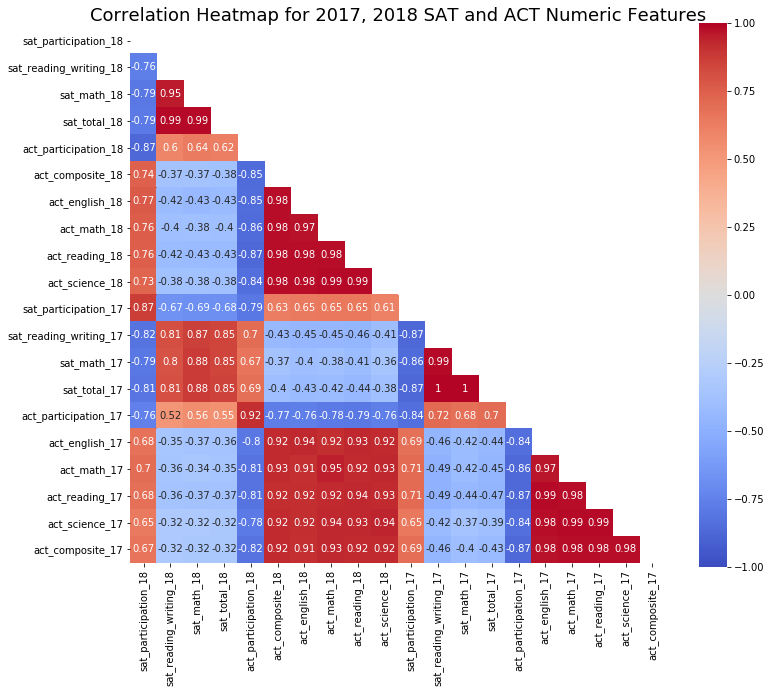

In [97]:
mask = np.triu(df.corr())
fig = plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr(), cmap="coolwarm", center=0, vmin=-1, vmax=1, square= True, mask=mask, annot=True)
ax.set_title('Correlation Heatmap for 2017, 2018 SAT and ACT Numeric Features', fontsize = 18);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [98]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [99]:
final_2017_2018[['sat_participation_18']].mode()

sat_participation_18
0                  0.03
1                  0.04

In [100]:
#defining own custom histogram plot
def subplot_histograms_2(dataframe, list_of_columns, list_of_titles, list_of_xlabels, figsize,y_ticks,list_of_ylabels,mastertitle):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize, sharex=True, sharey=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(mastertitle, fontsize=20)
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].axvline(dataframe[column].mean(),c='red',label= str(dataframe[column].mean()))
        ax[i].axvline(dataframe[column].median(),linestyle='--',c='orange',label=(f'Median'))
        #ax[i].axvline(dataframe.mode(),linestyle=':',c='green',label=(f'Mode'))
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        ax[i].set_yticks(y_ticks)
        plt.legend([ax[i].axvline(dataframe[column].mean(),c='red',label= str(dataframe[column].mean())), ax[i].axvline(dataframe[column].median(),linestyle='--',c='orange')], ['Mean', 'Median','Mode'],loc='upper left')

#### Participation rates for SAT & ACT 

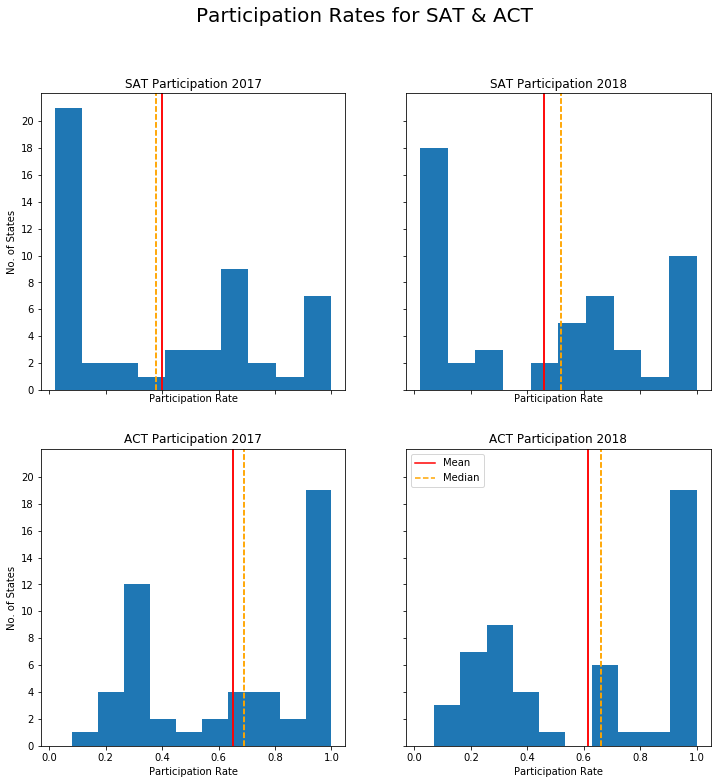

In [101]:
subplot_histograms_2(final_2017_2018,
                   ['sat_participation_17','sat_participation_18','act_participation_17','act_participation_18'],
                   ['SAT Participation 2017','SAT Participation 2018','ACT Participation 2017','ACT Participation 2018'],
                   ['Participation Rate','Participation Rate','Participation Rate','Participation Rate'],
                   (12,12),[i for i in range(0,21) if i%2 == 0],['No. of States','','No. of States',''],"Participation Rates for SAT & ACT");


* In both 2017 and 2018, the Mean and Median ACT participation is much higher then SAT participation rate.
* All tests show that there are two clusters with bimodal distribution
* However, the mode differs for both tests. Most of ACT's participation rate clusters around the 100% mark, while the SAT clusters around the 0% mark.
* Only SAT 2017 Participation has a lower median than its mean(right-skewed). The converse holds true for the rest of the graphs (left-skewed)

#### Math Scores for ACT and SAT

In [102]:
def subplot_histograms_scores(dataframe, list_of_columns, list_of_titles, list_of_xlabels, figsize,list_of_ylabels,y_ticks, mastertitle):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize= figsize) # You'll want to specify your figsize
    fig.suptitle(mastertitle, fontsize=20)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        ax[i].axvline(dataframe[column].mean(),c='red',label= str(dataframe[column].mean()))
        ax[i].axvline(dataframe[column].median(),linestyle='--',c='orange')
        ax[i].set_yticks(y_ticks)
        plt.legend([ax[i].axvline(dataframe[column].mean(),c='red',label= str(dataframe[column].mean())), ax[i].axvline(dataframe[column].median(),linestyle='--',c='orange')], ['Mean', 'Median'],loc='upper left')


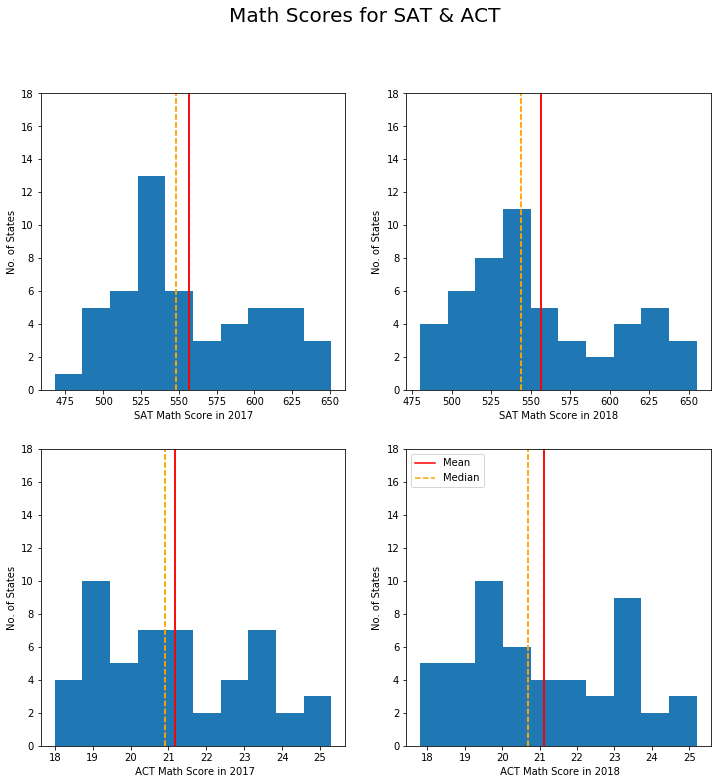

In [103]:
subplot_histograms_scores(final_2017_2018, 
                  ['sat_math_17','sat_math_18','act_math_17','act_math_18'],
                   ['SAT Math 2017','SAT Math 2018','ACT Math 2017','ACT Math 2018'],
                   ['SAT Math Score in 2017','SAT Math Score in 2018',' ACT Math Score in 2017',' ACT Math Score in 2018'],
                        (12,12), ['No. of States','No. of States','No. of States','No. of States'], [i for i in range(0,20) if i%2 == 0],"Math Scores for SAT & ACT")


* Math scores across the tests and years appears to sustain the same shape and similar skew

#### Reading/verbal scores for ACT and SAT

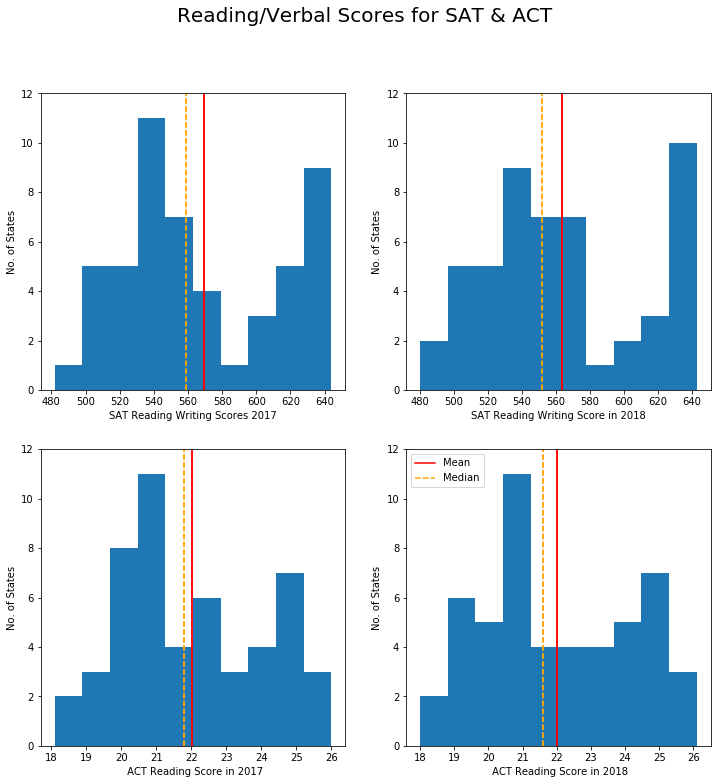

In [104]:
subplot_histograms_scores(final_2017_2018, 
                  ['sat_reading_writing_17','sat_reading_writing_18','act_reading_17','act_reading_18'],
                   ['SAT Reading Writing Scores 2017','SAT Reading Writing Scores 2018','ACT Reading Scores 2017','ACT Reading Scores 2018'],
                   ['SAT Reading Writing Scores 2017','SAT Reading Writing Score in 2018',' ACT Reading Score in 2017',' ACT Reading Score in 2018'],
                        (12,12), ['No. of States','No. of States','No. of States','No. of States'], [i for i in range(0,14) if i%2 == 0],'Reading/Verbal Scores for SAT & ACT'
)


* Same observations for the Reading/Writing Component across the two test 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [105]:
def custom_scatter_plot(datax, datay, xName, yName, title):
    x, y = pd.Series(datax, name=xName), pd.Series(datay, name=yName)
    ax = sns.regplot(x=x, y=y, marker="*",fit_reg= True, ci=95, truncate= True)
    plt.title(title)


#### SAT vs. ACT math scores for 2017

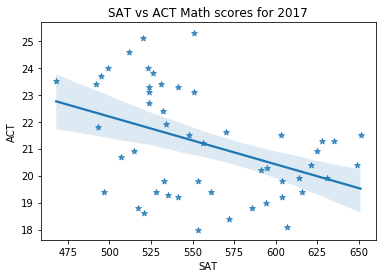

In [106]:
custom_scatter_plot(final_2017_2018['sat_math_17'],final_2017_2018['act_math_17'], "SAT","ACT","SAT vs ACT Math scores for 2017")

In [107]:
final_2017_2018['sat_math_17'].corr(final_2017_2018['act_math_17'])

-0.4204560393193175

* There is a weak relationship indicating states who achieve high SAT Math mean scores, score lower in ACT Math.


#### SAT vs. ACT verbal/reading scores for 2017

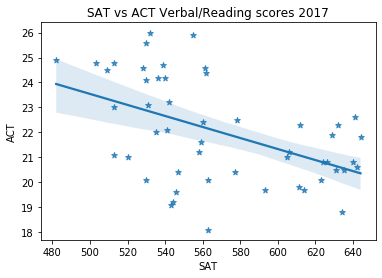

In [108]:
custom_scatter_plot(final_2017_2018['sat_reading_writing_17'],final_2017_2018['act_reading_17'], "SAT","ACT","SAT vs ACT Verbal/Reading scores 2017")

In [109]:
final_2017_2018['sat_reading_writing_17'].corr(final_2017_2018['act_reading_17'])

-0.4884406005231994

* There is a stronger correlation in this subject (as opposed to Math) across the two tests.
* However objectively, the absolute correlation value is rather weak at 0.489 (<0.50)

#### SAT vs. ACT total/composite scores for 2017

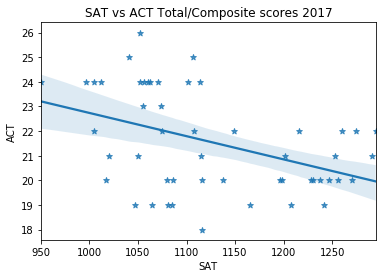

In [110]:
custom_scatter_plot(final_2017_2018['sat_total_17'],final_2017_2018['act_composite_17'], "SAT","ACT","SAT vs ACT Total/Composite scores 2017")

In [111]:
final_2017_2018['sat_total_17'].corr(final_2017_2018['act_composite_17'])

-0.4287350115819753

* There is weak correlation of the total/composite scores across the two tests in 2017

#### Total scores for SAT 2017 vs. 2018

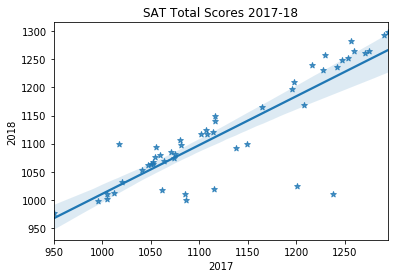

In [112]:
custom_scatter_plot(final_2017_2018['sat_total_17'],final_2017_2018['sat_total_18'], "2017","2018","SAT Total Scores 2017-18")

In [113]:
final_2017_2018['sat_total_17'].corr(final_2017_2018['sat_total_18'])

0.8527270956391397

* Shows a very strong positive trend where most states will continue to score well in the Total component if they performed well in the previous year 

#### Composite scores for ACT 2017 vs. 2018

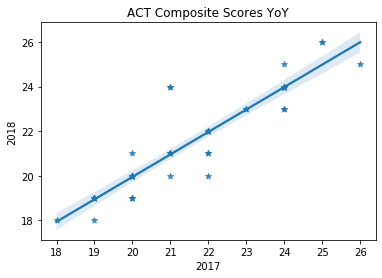

In [114]:
custom_scatter_plot(final_2017_2018['act_composite_17'],final_2017_2018['act_composite_18'], "2017","2018","ACT Composite Scores YoY")

In [115]:
final_2017_2018['act_composite_17'].corr(final_2017_2018['act_composite_18'])

0.923716672341002

* This is the same observation for the ACT component
* To conclude this section, this does signal a worrying caveat for the SAT College Board as states who participates in ACT test and perform well, have lesser reason to switch to SAT as trends show that they might not be able to maintain high performance, as displayed via the negative/small correlation.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

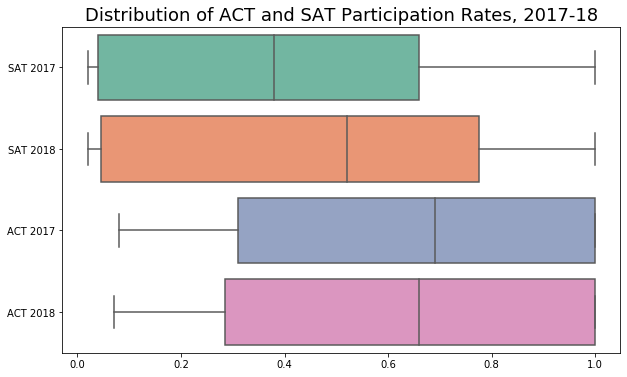

In [116]:
#Boxplot for ACT and SAT participation rates, 2017 and 2018 (4 vars)
participation_rates = final_2017_2018.loc[:,['sat_participation_17','sat_participation_18','act_participation_17','act_participation_18']]
participation_rates = participation_rates.rename(columns={
    'sat_participation_17':'SAT 2017',
    'sat_participation_18':'SAT 2018',
    'act_participation_17':'ACT 2017',
    'act_participation_18':'ACT 2018'
})
plt.figure(figsize=(10,6))
plt.title('Distribution of ACT and SAT Participation Rates, 2017-18', size=18)
sns.boxplot(data=participation_rates,orient='h',palette='Set2', whis=3.0, notch=False);

* Exemplifies the popularity of the ACT test, albeit a slight participation drop in 2018, and a wider spread
* The participation from ACT could have been shifted to SAT, as we see the median line shifted more to the right

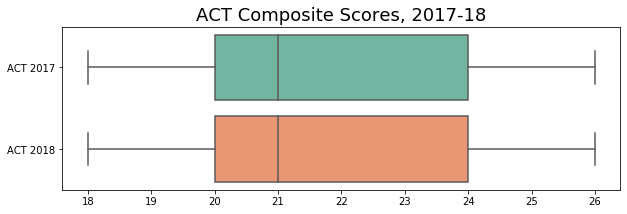

In [117]:
#Boxplot for ACT composite scores, 2017 and 2018 
act_scores_yoy = final_2017_2018.loc[:,['act_composite_17','act_composite_18']]
act_scores_yoy = act_scores_yoy.rename(columns={
    'act_composite_17':'ACT 2017',
    'act_composite_18':'ACT 2018',
})
plt.figure(figsize=(10,3))
plt.title('ACT Composite Scores, 2017-18', size=18)
sns.boxplot(data=act_scores_yoy,orient='h',palette='Set2', whis=3.0, notch=False);

* The spread and skew of the Composite from 2017-18 appears constant

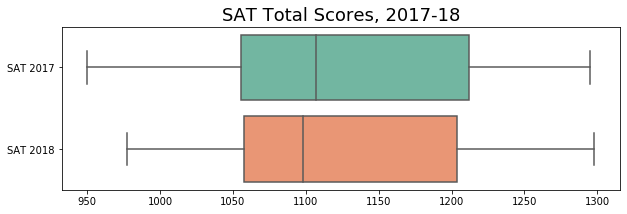

In [118]:
#Boxplot for SAT Total scores, 2017 and 2018 
sat_scores_yoy = final_2017_2018.loc[:,['sat_total_17','sat_total_18']]
sat_scores_yoy = sat_scores_yoy.rename(columns={
    'sat_total_17':'SAT 2017',
    'sat_total_18':'SAT 2018',
})
plt.figure(figsize=(10,3))
plt.title('SAT Total Scores, 2017-18', size=18)
sns.boxplot(data=sat_scores_yoy,orient='h',palette='Set2', whis=3.0, notch=False);

* Unlike the ACT counterpart, SAT scores had slightly lower median score YoY
* The spread of the scores is also slightly smaller

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### 1. Comparing Distribution of Scores for SAT and ACT across years

In [119]:
#Merging dataframes first
sat_2017_2018 = sat_2017.merge(sat_2018,how="outer",on=['state'])
sat_2017_2018.head()

state  sat_participation_17  sat_reading_writing_17  sat_math_17  \
0     Alabama                  0.05                     593          572   
1      Alaska                  0.38                     547          533   
2     Arizona                  0.30                     563          553   
3    Arkansas                  0.03                     614          594   
4  California                  0.53                     531          524   

   sat_total_17  sat_participation_18  sat_reading_writing_18  sat_math_18  \
0          1165                  0.06                     595          571   
1          1080                  0.43                     562          544   
2          1116                  0.29                     577          572   
3          1208                  0.05                     592          576   
4          1055                  0.60                     540          536   

   sat_total_18  
0          1166  
1          1106  
2          1149  
3          1169  
4          1076

In [120]:
act_2017_2018 = act_2017.merge(act_2018,how="outer",on=['state'])
act_2017_2018.head()

state  act_participation_17  act_english_17  act_math_17  \
0     Alabama                  1.00            18.9         18.4   
1      Alaska                  0.65            18.7         19.8   
2     Arizona                  0.62            18.6         19.8   
3    Arkansas                  1.00            18.9         19.0   
4  California                  0.31            22.5         22.7   

   act_reading_17  act_science_17  act_composite_17  act_participation_18  \
0            19.7            19.4                19                  1.00   
1            20.4            19.9                20                  0.33   
2            20.1            19.8                20                  0.66   
3            19.7            19.5                19                  1.00   
4            23.1            22.2                23                  0.27   

   act_composite_18  act_english_18  act_math_18  act_reading_18  \
0                19            18.9         18.3            19.6   
1                21            19.8         20.6            21.6   
2                19            18.2         19.4            19.5   
3                19            19.1         18.9            19.7   
4                23            22.5         22.5            23.0   

   act_science_18  
0            19.0  
1            20.7  
2            19.2  
3            19.4  
4            22.1

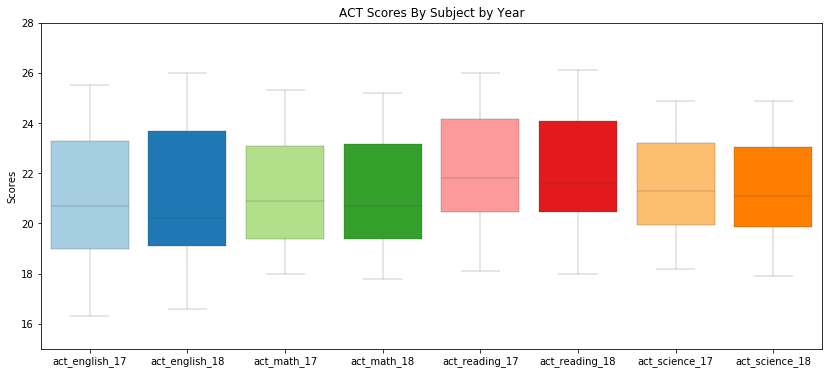

In [121]:
#Plotting for ACT Subjects
plt.figure(figsize=(14,6))
sns.color_palette("rocket_r")
sns.boxplot(data=act_2017_2018[['act_english_17','act_english_18',
                                'act_math_17','act_math_18',
                                'act_reading_17','act_reading_18',
                                'act_science_17','act_science_18']], orient='v',
           fliersize=8, linewidth=0.25, saturation=1.0,
           whis=1.0, palette= "Paired").set(title='ACT Scores By Subject by Year', ylabel='Scores')
plt.ylim(15, 28);

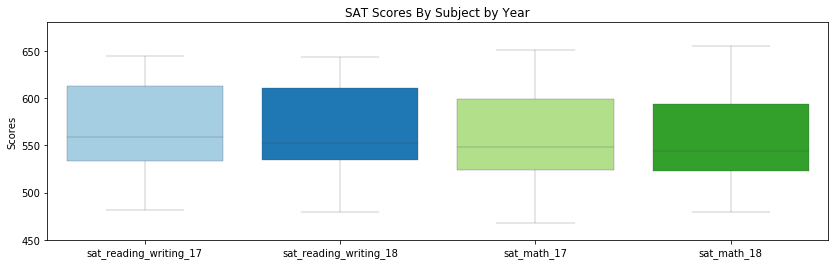

In [122]:
#Plotting for SAT Subjects
plt.figure(figsize=(14,4))
sns.boxplot(data=sat_2017_2018[['sat_reading_writing_17','sat_reading_writing_18',
                                'sat_math_17','sat_math_18']], orient='v',
           fliersize=8, linewidth=0.25, saturation=1.0,
           whis=1.0, palette= "Paired", notch= False).set(title='SAT Scores By Subject by Year', ylabel='Scores')
plt.ylim(450, 680);

* Not much to tease out, as the spread of the scores per subject per year for each test is similar

#### 2. Visualizing which state is penalized with a lower composite/total score for having a higher participation rate

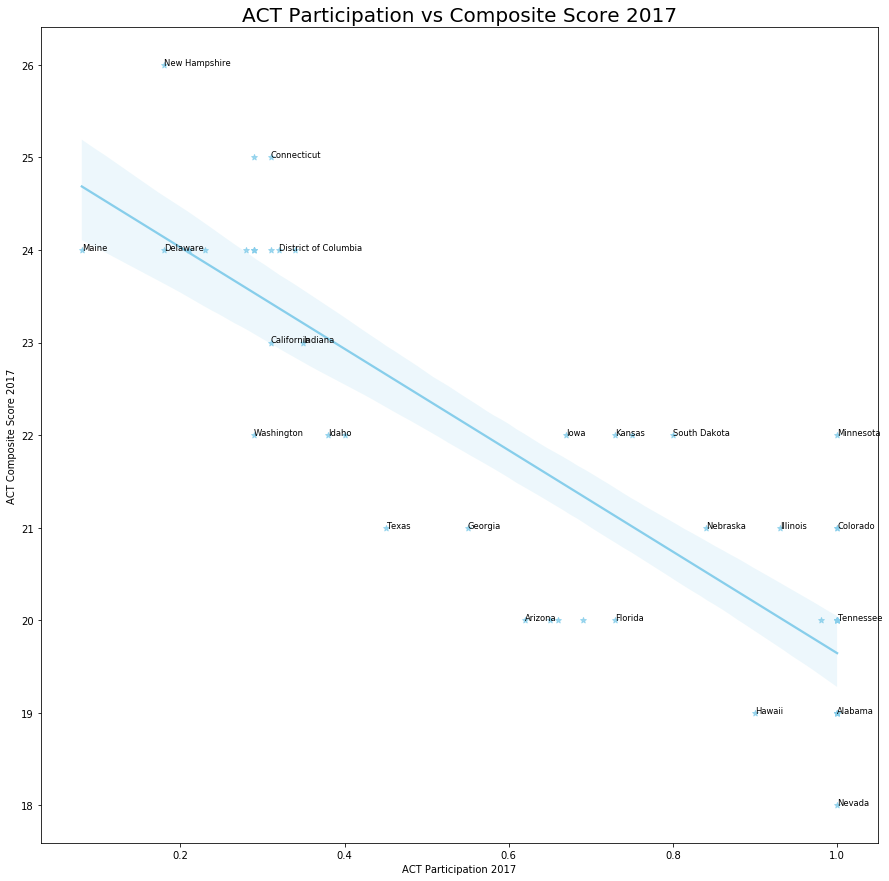

In [123]:
plt.figure(figsize=(15, 15))
x, y = pd.Series(act_2017['act_participation_17'], name="ACT Participation 2017"), pd.Series(act_2017['act_composite_17'], name="ACT Composite Score 2017")
ax = sns.regplot(x=x, y=y, marker="*",fit_reg= True, ci=95, truncate= True, color="skyblue")
plt.title("ACT Participation vs Composite Score 2017",fontsize=20)
for x in act_2017.state:
    if x in ['Alabama', 'Arizona','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Iowa','Kansas','Maine','Minnesota','Nebraska','District of Columbia','South Dakota','Texas','Washington','New Hampshire','Indiana','Nevada','Tennessee']:
        plt.text(act_2017.loc[act_2017['state']==x]['act_participation_17'], act_2017.loc[act_2017['state']==x]['act_composite_17'], x, horizontalalignment='left', size='small', color='black', weight='normal')

# plt.text(act_2017.loc[act_2017['state']=='Tennessee']['act_participation_17'], act_2017.loc[act_2017['state']=='Tennessee']['act_composite_17'], "Tennessee", horizontalalignment='left', size='small', color='black', weight='normal');

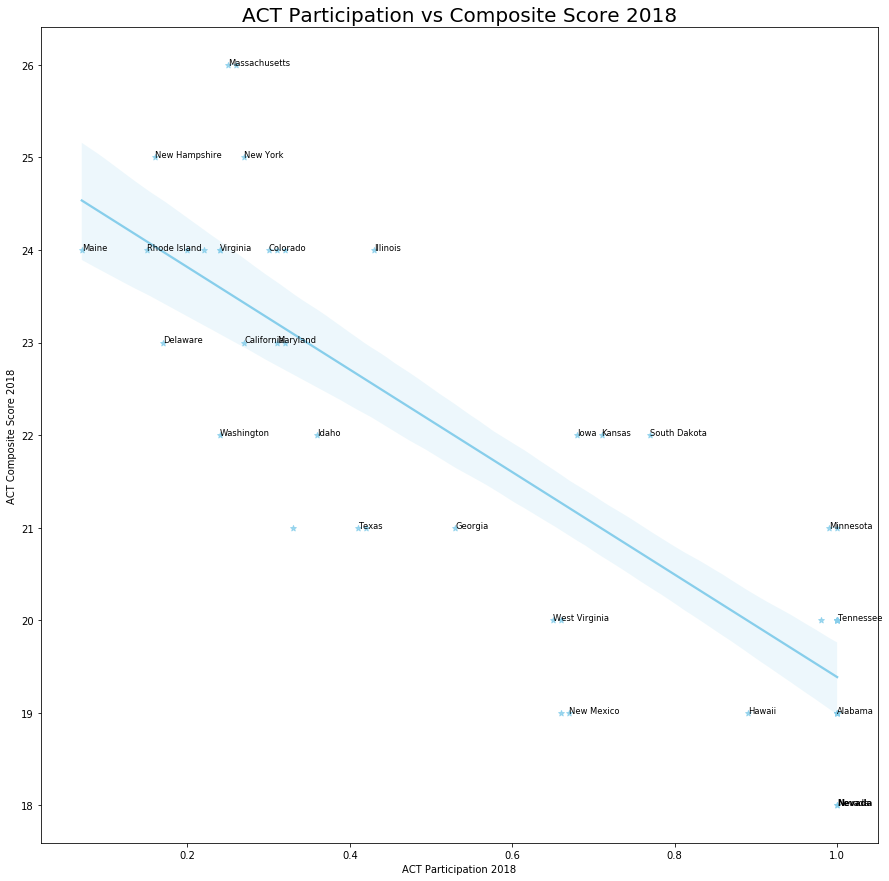

In [124]:
plt.figure(figsize=(15, 15))
x, y = pd.Series(act_2018['act_participation_18'], name="ACT Participation 2018"), pd.Series(act_2018['act_composite_18'], name="ACT Composite Score 2018")
ax = sns.regplot(x=x, y=y, marker="*",fit_reg= True, ci=95, truncate= True, color="skyblue")
plt.title("ACT Participation vs Composite Score 2018",fontsize=20)
for x in act_2017.state:
    if x in ['Nevada']:
        plt.text(act_2018.loc[act_2018['state']==x]['act_participation_18'], act_2018.loc[act_2018['state']==x]['act_composite_18'], x, horizontalalignment='left', size='small', color='black', weight='semibold')
    if x in ['Alabama','California','Delaware','Georgia','Hawaii','Idaho','Illinois','Iowa','Kansas','Maine','Maryland','Massachusetts','New Hampshire','New Mexico','New Mexico','New York','Rhode Island','South Dakota','Texas','Virginia','Washington','Tennessee','Colorado','Minnesota','West Virginia','Nevada']:
        plt.text(act_2018.loc[act_2018['state']==x]['act_participation_18'], act_2018.loc[act_2018['state']==x]['act_composite_18'], x, horizontalalignment='left', size='small', color='black', weight='normal')


* In both years, Nevada achieves the lowest composite score, but with the highest participation rate

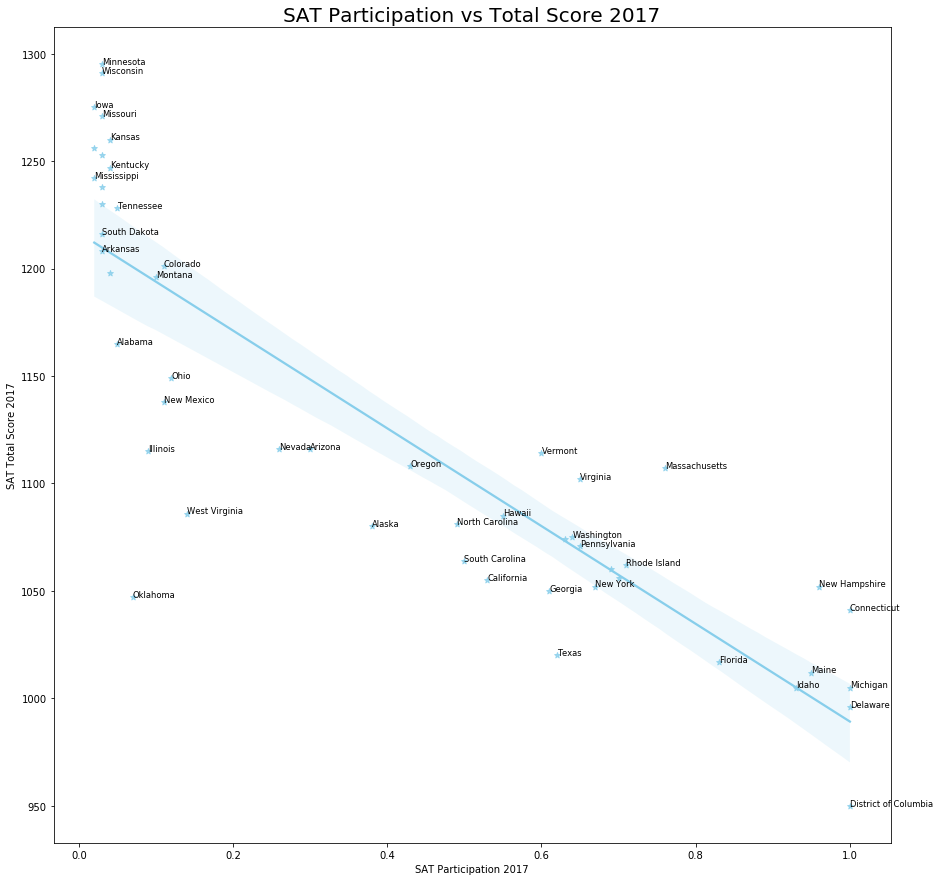

In [125]:
plt.figure(figsize=(15, 15))
x, y = pd.Series(sat_2017['sat_participation_17'], name="SAT Participation 2017"), pd.Series(sat_2017['sat_total_17'], name="SAT Total Score 2017")
ax = sns.regplot(x=x, y=y, marker="*",fit_reg= True, ci=95, truncate= True, color="skyblue")
plt.title("SAT Participation vs Total Score 2017",fontsize=20)
for x in sat_2017.state:
    if x in ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Iowa','Kansas','Kentucky','Maine','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nevada','New Mexico','New York','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Vermont','Virginia','Washington','West Virginia','Wisconsin','North Carolina','New Hampshire']:
        plt.text(sat_2017.loc[sat_2017['state']==x]['sat_participation_17'], sat_2017.loc[sat_2017['state']==x]['sat_total_17'], x, horizontalalignment='left', size='small', color='black', weight='normal')

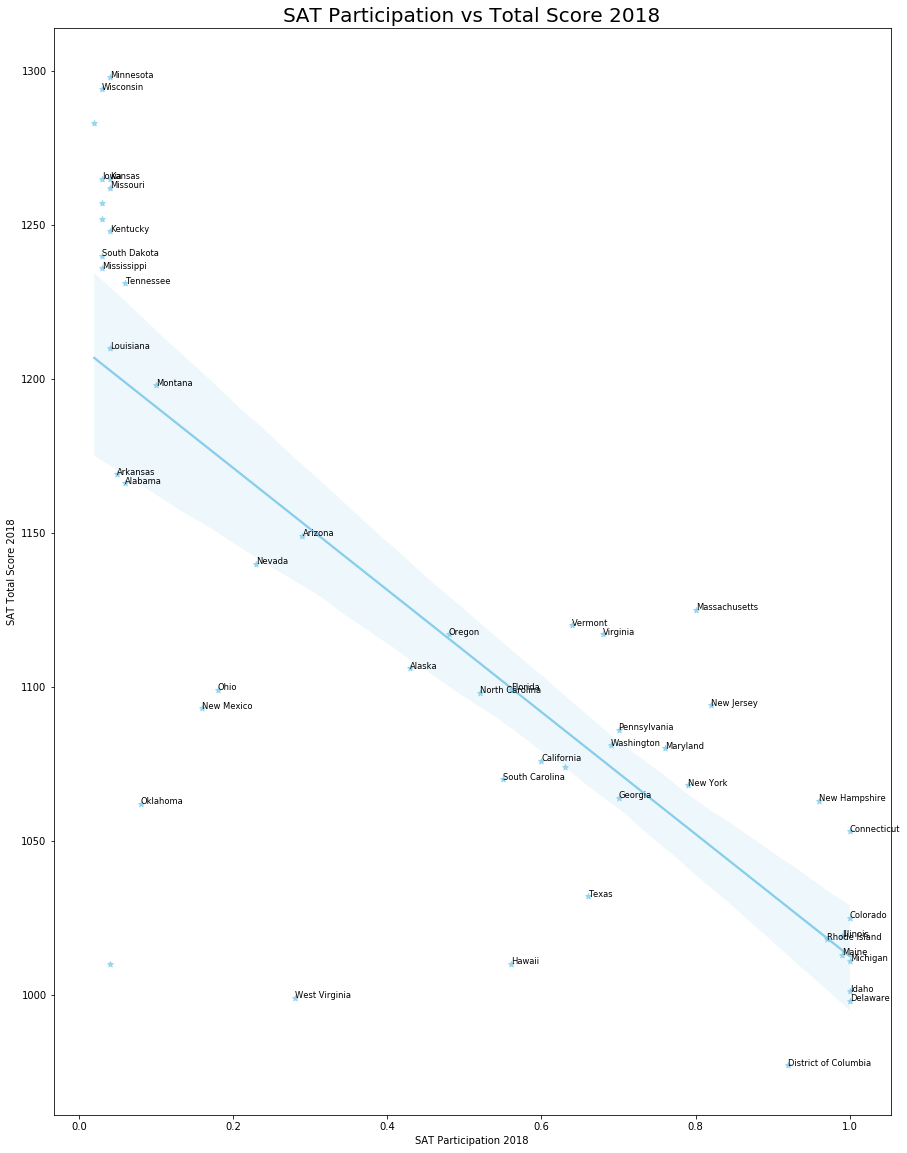

In [126]:
plt.figure(figsize=(15, 20))
x, y = pd.Series(sat_2018['sat_participation_18'], name="SAT Participation 2018"), pd.Series(sat_2018['sat_total_18'], name="SAT Total Score 2018")
ax = sns.regplot(x=x, y=y, marker="*",fit_reg= True, ci=95, truncate= True, color="skyblue")
plt.title("SAT Participation vs Total Score 2018",fontsize=20)
for x in sat_2018.state:
    if x in ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Iowa','Kansas','Kentucky','Maine','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nevada','New Mexico','New York','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Vermont','Virginia','Washington','West Virginia','Wisconsin','North Carolina','New Hampshire','New Jersey','Maryland','Louisiana']:
        plt.text(sat_2018.loc[sat_2018['state']==x]['sat_participation_18'], sat_2018.loc[sat_2018['state']==x]['sat_total_18'], x, horizontalalignment='left', size='small', color='black', weight='normal')

* Similar to Nevada for ACT, District of Columbia has been 'penalized' with low scores by being highly participative in the SAT

#### 3. Significant Changes in SAT Participation, 2017-18

To identify potential states for SAT College Board to encourage participation, we can look from 2 aspects:
1. States who have huge increase in SAT participation (Are there policies that these states implemented that can further improve, and replicate in other states?)
2. States who have huge decrease in SAT participation (Are there policies/schemes that College Board can introduce to get back and improve the participation?)

##### States that have increased in participation the most

In [127]:
final_2017_2018['sat_participation_change']=final_2017_2018['sat_participation_18'] - final_2017_2018['sat_participation_17']
final_2017_2018.sort_values('sat_participation_change',ascending=False)[['state','sat_participation_17','sat_participation_18','sat_participation_change']].head(4)

state  sat_participation_17  sat_participation_18  \
13       Illinois                  0.09                  0.99   
5        Colorado                  0.11                  1.00   
39   Rhode Island                  0.71                  0.97   
48  West Virginia                  0.14                  0.28   

    sat_participation_change  
13                      0.90  
5                       0.89  
39                      0.26  
48                      0.14

* Furthering our findings, other than Colorado, Illinois is another state that have high positive change to SAT Participation Rates

##### States that have dropped out from SAT the most

In [128]:
final_2017_2018['sat_participation_change']=final_2017_2018['sat_participation_18'] - final_2017_2018['sat_participation_17']
final_2017_2018.sort_values('sat_participation_change',ascending=False)[['state','sat_participation_17','sat_participation_18','sat_participation_change']].tail(4)

state  sat_participation_17  sat_participation_18  \
2                Arizona                  0.30                  0.29   
28                Nevada                  0.26                  0.23   
8   District of Columbia                  1.00                  0.92   
9                Florida                  0.83                  0.56   

    sat_participation_change  
2                      -0.01  
28                     -0.03  
8                      -0.08  
9                      -0.27

* We will need to investigate further why Florida's participation rate had dropped 27%

#### 4. Significant Changes in ACT Participation, 2017-18

On the flip side, we can additionally target states who dropped a drop in ACT participation, and also with a low SAT participation rate. These are states where there is lesser competition against the ACT examination board.

In [129]:
final_2017_2018['act_participation_change']=final_2017_2018['act_participation_18'] - final_2017_2018['act_participation_17']

In [130]:
final_2017_2018.sort_values('act_participation_change', ascending=True)[['state','act_participation_17','act_participation_18','sat_participation_17','sat_participation_18','act_participation_change']].head(4)

state  act_participation_17  act_participation_18  \
5   Colorado                  1.00                  0.30   
13  Illinois                  0.93                  0.43   
1     Alaska                  0.65                  0.33   
22  Michigan                  0.29                  0.22   

    sat_participation_17  sat_participation_18  act_participation_change  
5                   0.11                  1.00                     -0.70  
13                  0.09                  0.99                     -0.50  
1                   0.38                  0.43                     -0.32  
22                  1.00                  1.00                     -0.07

* Tieing up with our previous findings, it appears that the increase in SAT participation from Colorado and Illinois was not due to more students in the state participating, but due to a shift from ACT to SAT
* New to our findings, we see Alaska reducing its participation rate by 32%. We can consider promoting SAT more in this state

#### 4a. Are there shifts of participation from one test to another?

We can further observe this from a distplot. Both tests in both years form two clusters (states with high participation and states with low participation). The lower peak of a particular test type is always overlapped witht the higher peak of the another test type.

* This visually exemplifies how most states with lowwer participation rate in one test, has higher participration in the other
* States tend to favor one type of test other than the other.

<Figure size 1440x1440 with 0 Axes>

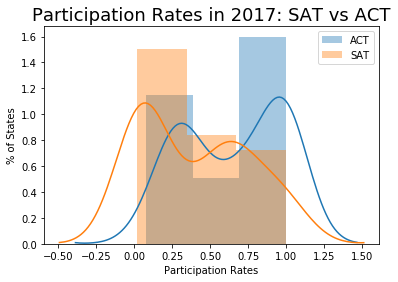

In [131]:
fig = plt.figure(figsize=(20,20))
plt.figure("Participation Rates 2017: SAT vs ACT")
x = pd.Series(final_2017_2018.act_participation_17)
x_2 = pd.Series(final_2017_2018.sat_participation_17)
sns.distplot(x,label="ACT")
sns.distplot(x_2,label="SAT")
#plt.axvline(np.median(x), color='orange',alpha=0.5)
#plt.axvline(np.median(x_2), color='cornflowerblue',alpha=0.5)
plt.title("Participation Rates in 2017: SAT vs ACT", fontsize=18)
plt.xlabel('Participation Rates')
plt.ylabel('% of States')
plt.legend()
plt.show();

<Figure size 1440x1440 with 0 Axes>

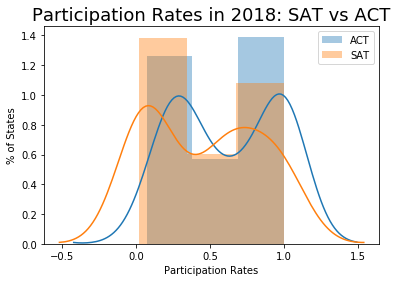

In [132]:
fig = plt.figure(figsize=(20,20))
plt.figure("Participation Rates 2018: SAT vs ACT")
y = pd.Series(final_2017_2018.act_participation_18)
y_2 = pd.Series(final_2017_2018.sat_participation_18)
sns.distplot(y,label="ACT")
sns.distplot(y_2,label="SAT")
#plt.axvline(np.median(y), color='orange',alpha=0.5)
#plt.axvline(np.median(y_2), color='cornflowerblue',alpha=0.5)
plt.title("Participation Rates in 2018: SAT vs ACT", fontsize=18)
plt.xlabel('Participation Rates')
plt.ylabel('% of States')
plt.legend()
plt.show();

#### 5. Analyzing States with High Participating SAT and ACT Rates 2017, 2018

Finding states that have above the mean participation rate in 2017

In [133]:
final_2017_2018[(final_2017_2018['act_participation_17'] > final_2017_2018['act_participation_17'].mean()) & (final_2017_2018['sat_participation_17'] > final_2017_2018['sat_participation_17'].mean())][['state','sat_participation_17','act_participation_17']]

state  sat_participation_17  act_participation_17
9          Florida                  0.83                  0.73
11          Hawaii                  0.55                  0.90
33  North Carolina                  0.49                  1.00
40  South Carolina                  0.50                  1.00

Finding states that have above the mean participation rate in 2018

In [134]:
final_2017_2018[(final_2017_2018['act_participation_18'] > final_2017_2018['act_participation_18'].mean()) & (final_2017_2018['sat_participation_18'] > final_2017_2018['sat_participation_18'].mean())][['state','sat_participation_18','act_participation_18']]

state  sat_participation_18  act_participation_18
9          Florida                  0.56                  0.66
11          Hawaii                  0.56                  0.89
33  North Carolina                  0.52                  1.00
40  South Carolina                  0.55                  1.00

In [135]:
4/51

0.0784313725490196

* The states that have higher than average participation in both SAT and ACT in both 2017 & 2018 are the same. They make up 0.08% of the total states in US

#### 6. Analyzing States with Low Participating SAT and ACT Rates 2017, 2018

Finding states that have below the mean participation rate in 2017

In [136]:
final_2017_2018[(final_2017_2018['act_participation_17'] < final_2017_2018['act_participation_17'].mean()) & (final_2017_2018['sat_participation_17'] < final_2017_2018['sat_participation_17'].mean())][['state','sat_participation_17','act_participation_17']]

state  sat_participation_17  act_participation_17
1   Alaska                  0.38                  0.65
2  Arizona                  0.30                  0.62

Finding states that have below the mean participation rate in 2018

In [137]:
final_2017_2018[(final_2017_2018['act_participation_18'] < final_2017_2018['act_participation_18'].mean()) & (final_2017_2018['sat_participation_18'] < final_2017_2018['sat_participation_18'].mean())][['state','sat_participation_18','act_participation_18']]

state  sat_participation_18  act_participation_18
1  Alaska                  0.43                  0.33

* One state (Alaska) remains low for both tests.
* This additional insight appears to verify against our previous insight where Alaska is a potential state for SAT promotion. We might need to further assess as it seems that the state has a general drop in interest in all tests.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [138]:
#Creating a diction with names to state codes 
state_codes = {
    'District of Columbia' : 'DC','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}

#creating a new column to map state names to state codes
final_2017_2018['state_code'] = final_2017_2018['state'].apply(lambda x : state_codes[x])

In [139]:
final_2017_2018[['state','sat_participation_18','state_code']]

state  sat_participation_18 state_code
0                Alabama                  0.06         AL
1                 Alaska                  0.43         AK
2                Arizona                  0.29         AZ
3               Arkansas                  0.05         AR
4             California                  0.60         CA
5               Colorado                  1.00         CO
6            Connecticut                  1.00         CT
7               Delaware                  1.00         DE
8   District of Columbia                  0.92         DC
9                Florida                  0.56         FL
10               Georgia                  0.70         GA
11                Hawaii                  0.56         HI
12                 Idaho                  1.00         ID
13              Illinois                  0.99         IL
14               Indiana                  0.63         IN
15                  Iowa                  0.03         IA
16                Kansas                  0.04         KS
17              Kentucky                  0.04         KY
18             Louisiana                  0.04         LA
19                 Maine                  0.99         ME
20              Maryland                  0.76         MD
21         Massachusetts                  0.80         MA
22              Michigan                  1.00         MI
23             Minnesota                  0.04         MN
24           Mississippi                  0.03         MS
25              Missouri                  0.04         MO
26               Montana                  0.10         MT
27              Nebraska                  0.03         NE
28                Nevada                  0.23         NV
29         New Hampshire                  0.96         NH
30            New Jersey                  0.82         NJ
31            New Mexico                  0.16         NM
32              New York                  0.79         NY
33        North Carolina                  0.52         NC
34          North Dakota                  0.02         ND
35              Oklahoma                  0.08         OK
36                  Ohio                  0.18         OH
37                Oregon                  0.48         OR
38          Pennsylvania                  0.70         PA
39          Rhode Island                  0.97         RI
40        South Carolina                  0.55         SC
41          South Dakota                  0.03         SD
42             Tennessee                  0.06         TN
43                 Texas                  0.66         TX
44                  Utah                  0.04         UT
45               Vermont                  0.64         VT
46              Virginia                  0.68         VA
47            Washington                  0.69         WA
48         West Virginia                  0.28         WV
49             Wisconsin                  0.03         WI
50               Wyoming                  0.03         WY

In [140]:
fig_sat_2017 = go.Figure(data=go.Choropleth(
    locations=final_2017_2018['state_code'], # Spatial coordinates
    z = final_2017_2018['sat_participation_17'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage",
))

fig_sat_2017.update_layout(
    title_text = '2017 US SAT Participation by State',
    geo_scope='usa', # limit map scope to USA
)



In [141]:
fig_sat_2018 = go.Figure(data=go.Choropleth(
    locations=final_2017_2018['state_code'], # Spatial coordinates
    z = final_2017_2018['sat_participation_18'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage",
))

fig_sat_2018.update_layout(
    title_text = '2018 US SAT Participation by State',
    geo_scope='usa', # limit map scope to USA
)

In [142]:
fig_act_2017 = go.Figure(data=go.Choropleth(
    locations=final_2017_2018['state_code'], # Spatial coordinates
    z = final_2017_2018['act_participation_17'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage",
))

fig_act_2017.update_layout(
    title_text = '2017 US ACT Participation by State',
    geo_scope='usa', # limit map scope to USA
)



In [143]:
fig_act_2018 = go.Figure(data=go.Choropleth(
    locations=final_2017_2018['state_code'], # Spatial coordinates
    z = final_2017_2018['act_participation_18'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage",
))

fig_act_2018.update_layout(
    title_text = '2018 US ACT Participation by State',
    geo_scope='usa', # limit map scope to USA
)



In [160]:
fig_sat_total_2017 = go.Figure(data=go.Choropleth(
    locations=final_2017_2018['state_code'], # Spatial coordinates
    z = final_2017_2018['sat_total_17'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Score"
))

fig_sat_total_2017.update_layout(
    title_text = '2017 US SAT Total Score by State',
    geo_scope='usa', # limit map scope to USA
)


In [158]:
fig_sat_total_2018 = go.Figure(data=go.Choropleth(
    locations=final_2017_2018['state_code'], # Spatial coordinates
    z = final_2017_2018['sat_total_18'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Score",
))

fig_sat_total_2018.update_layout(
    title_text = '2018 US SAT Total Score by State',
    geo_scope='usa', # limit map scope to USA
)


## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

Using Pairplots

In [144]:
#printing out available columns to select features to pass in
final_2017_2018.columns

Index(['state', 'sat_participation_18', 'sat_reading_writing_18',
       'sat_math_18', 'sat_total_18', 'act_participation_18',
       'act_composite_18', 'act_english_18', 'act_math_18', 'act_reading_18',
       'act_science_18', 'sat_participation_17', 'sat_reading_writing_17',
       'sat_math_17', 'sat_total_17', 'act_participation_17', 'act_english_17',
       'act_math_17', 'act_reading_17', 'act_science_17', 'act_composite_17',
       'act_partchange_100', 'sat_partchange_100', 'sat_participation_change',
       'act_participation_change', 'state_code'],
      dtype='object')

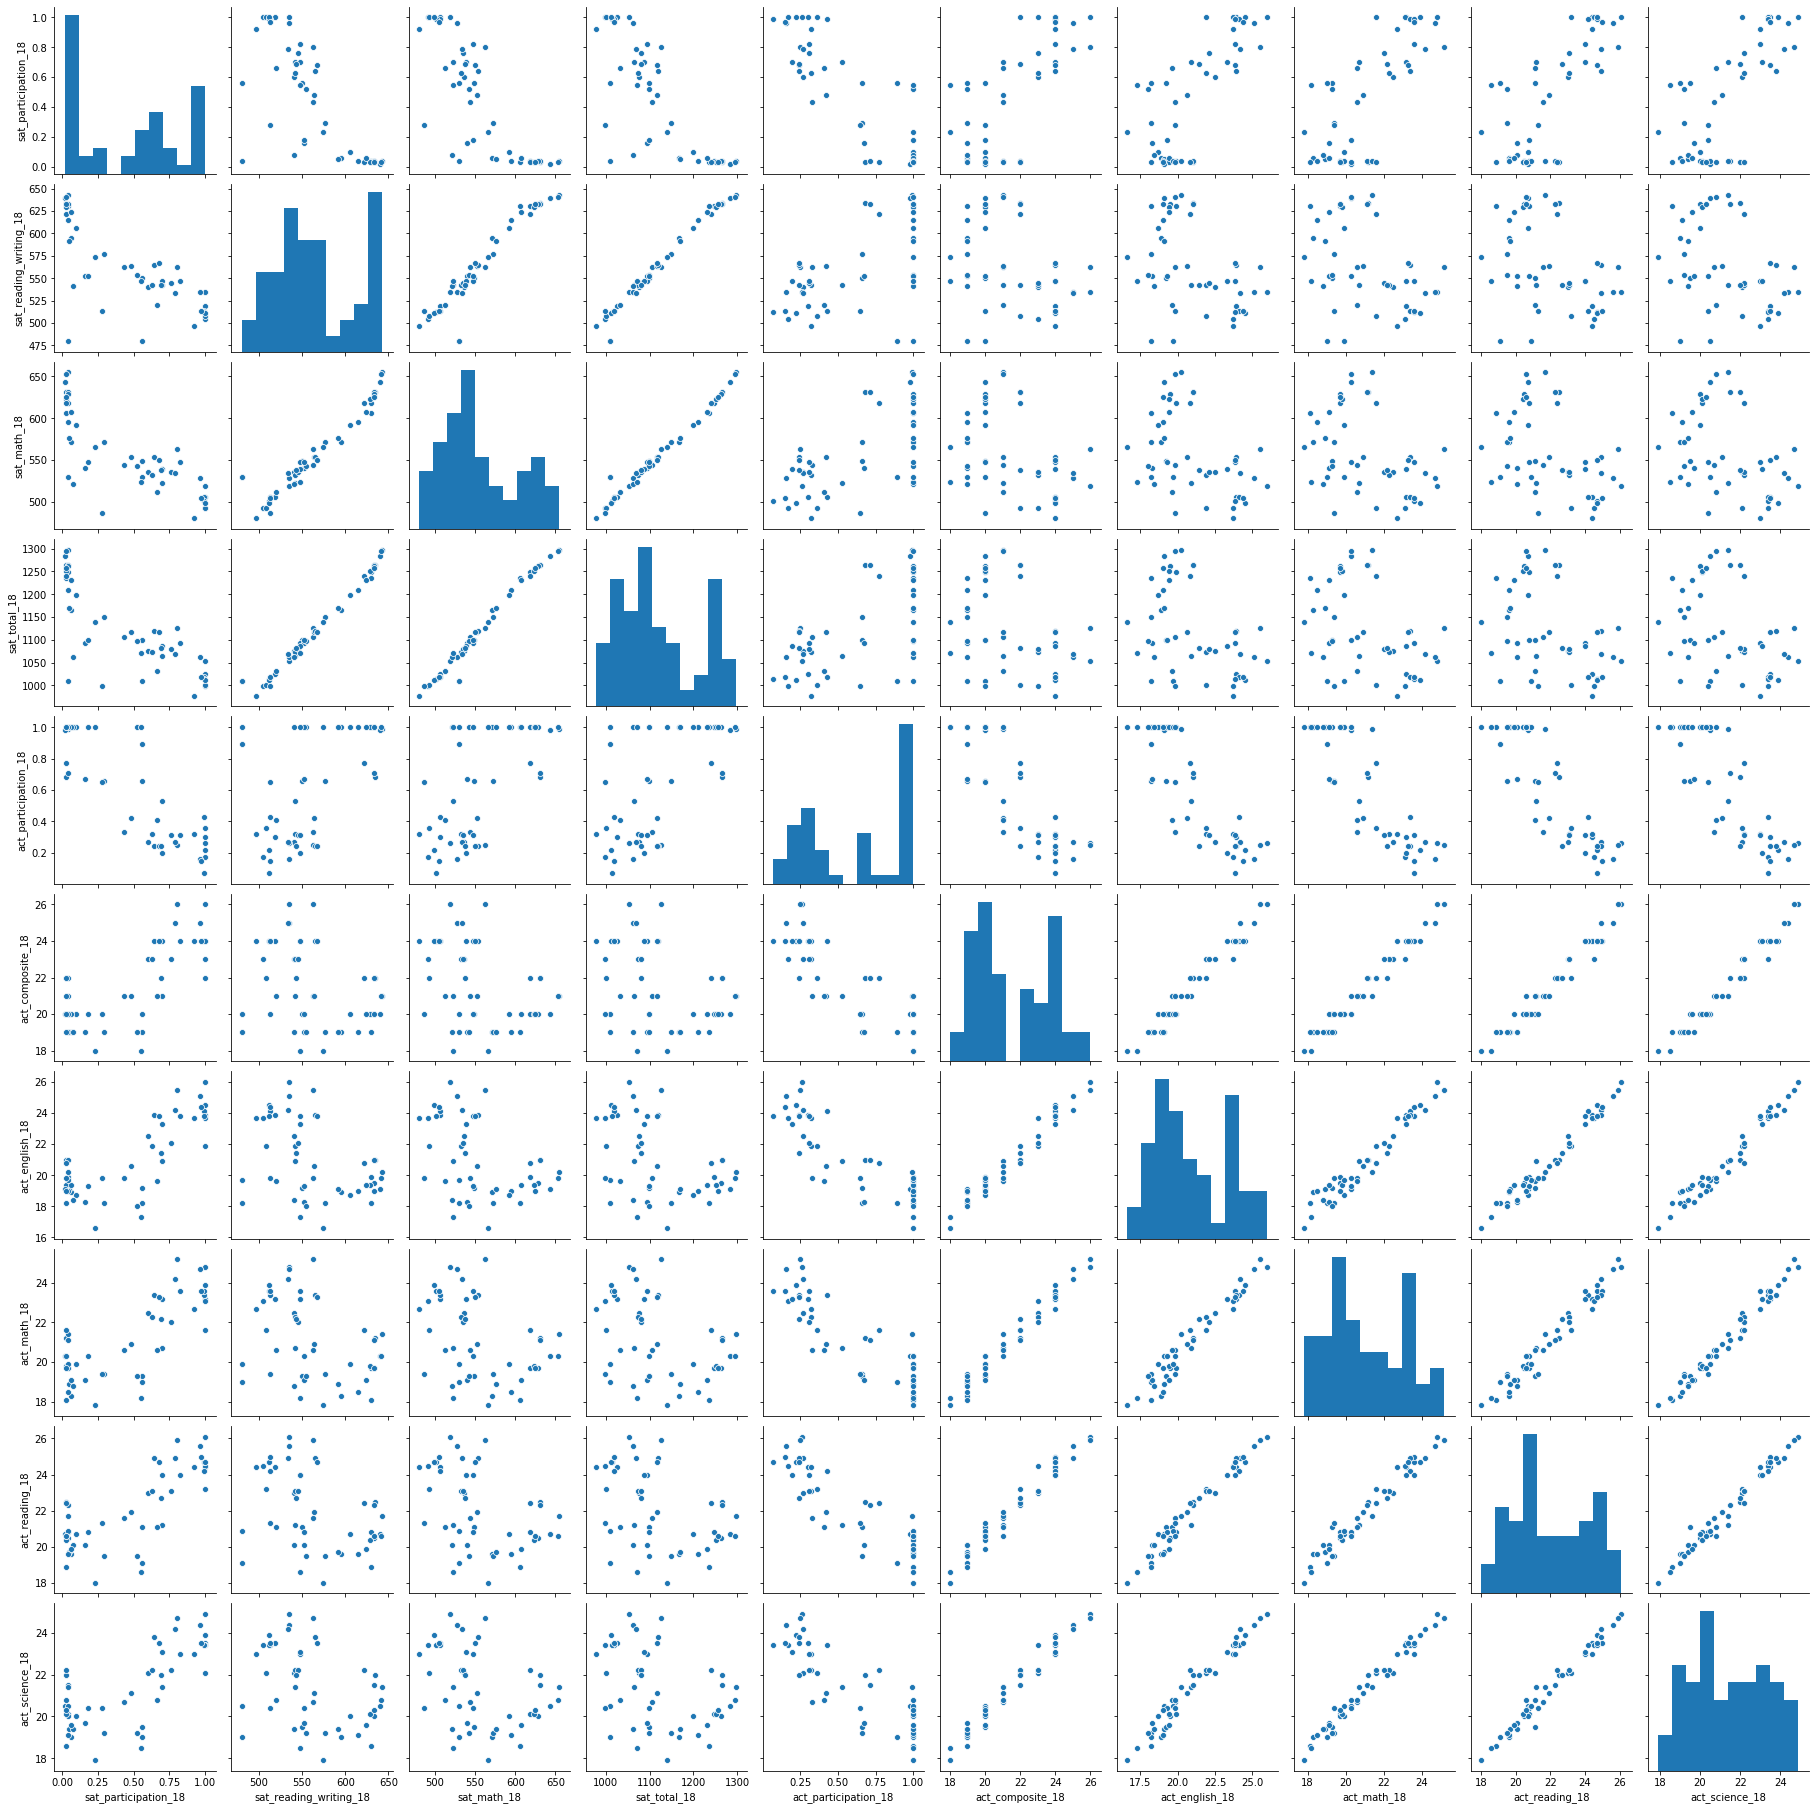

In [145]:
#2018
sns.pairplot(final_2017_2018,vars=['sat_participation_18', 'sat_reading_writing_18',
       'sat_math_18', 'sat_total_18', 'act_participation_18',
       'act_composite_18', 'act_english_18', 'act_math_18', 'act_reading_18',
       'act_science_18'])

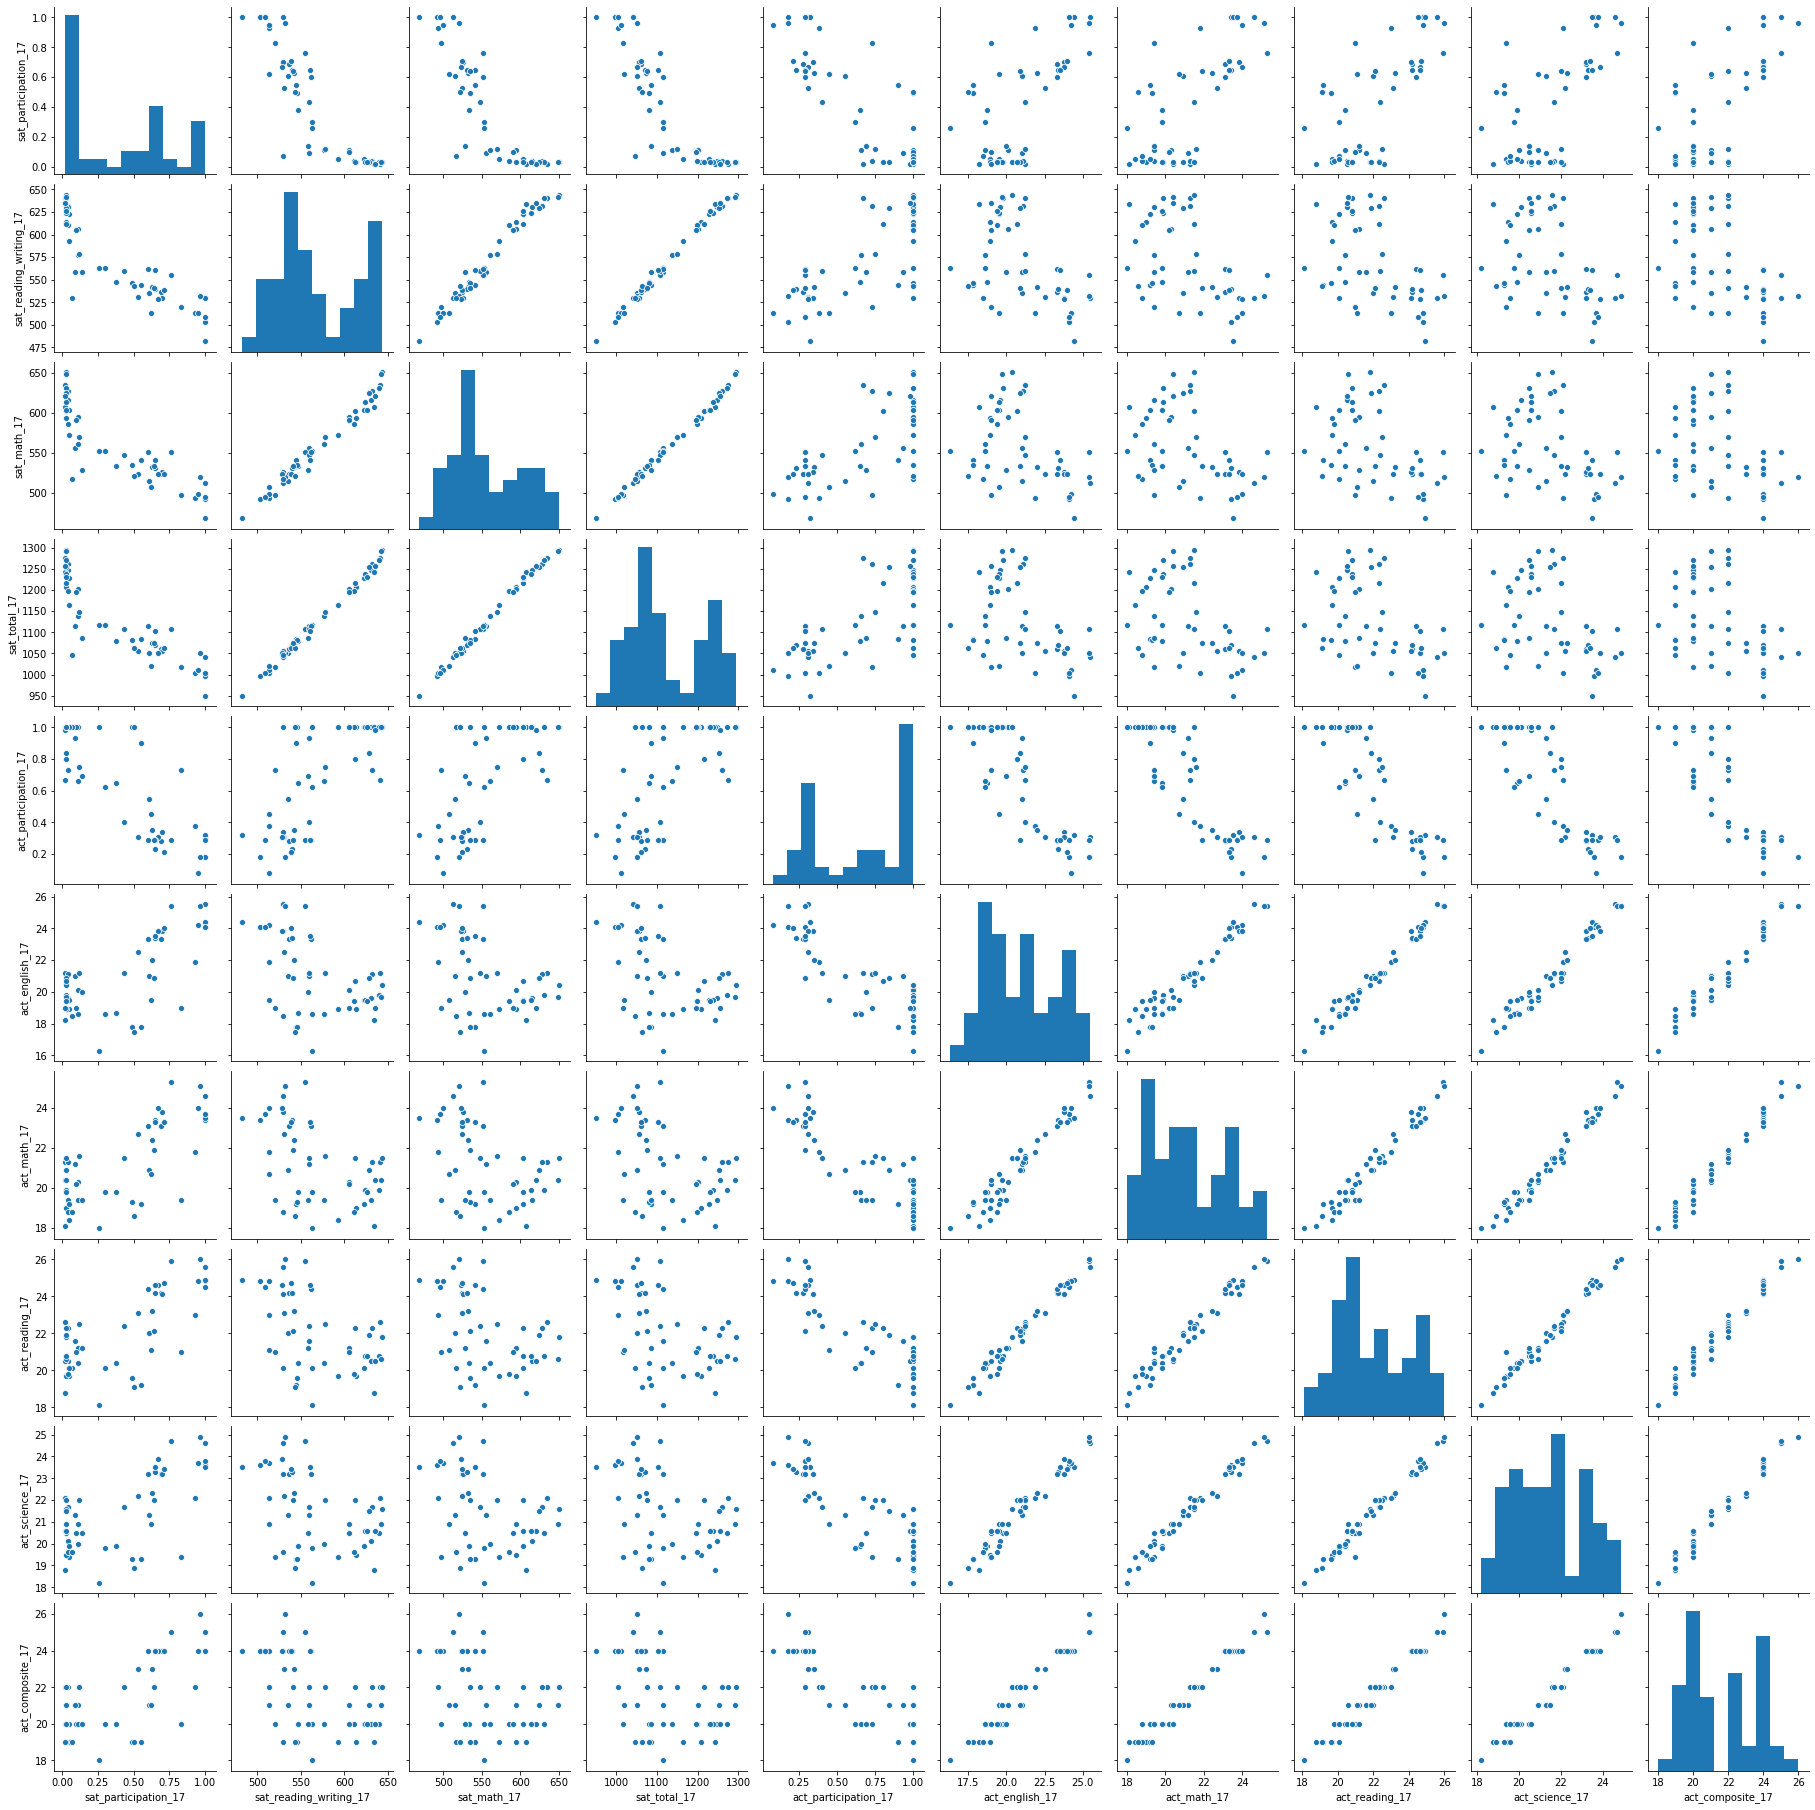

In [146]:
#2017
sns.pairplot(final_2017_2018,vars=['sat_participation_17', 'sat_reading_writing_17',
       'sat_math_17', 'sat_total_17', 'act_participation_17', 'act_english_17',
       'act_math_17', 'act_reading_17', 'act_science_17', 'act_composite_17'])

Using Scipy and loops

In [147]:
#Using back our previous defined numeric features
selection_list

['sat_participation_18',
 'sat_reading_writing_18',
 'sat_math_18',
 'sat_total_18',
 'act_participation_18',
 'act_composite_18',
 'act_english_18',
 'act_math_18',
 'act_reading_18',
 'act_science_18',
 'sat_participation_17',
 'sat_reading_writing_17',
 'sat_math_17',
 'sat_total_17',
 'act_participation_17',
 'act_english_17',
 'act_math_17',
 'act_reading_17',
 'act_science_17',
 'act_composite_17']

In [148]:
for col in selection_list:
    
    norm_pvalue = stats.normaltest(final_2017_2018[col]) # do a normal test, return p value
    col_skew = skew(final_2017_2018[col]) # do the skew test
           
           
    if norm_pvalue[1] < .05: 
        
        print('{} is not normally distributed since the pvalue {} is less than .05. The skew is {}\n'
              .format(col.title(), np.round(norm_pvalue[1],decimals=5), np.round(col_skew,decimals=5)))
        
    else:
         print('{} is normally distributed since the pvalue {} is greater than .05. The skew is {}\n'
               .format(col.title(), np.round(norm_pvalue[1],decimals=5), np.round(col_skew,decimals=5)))
        
#skewness = 0 : normally distributed.
# skewness > 0 : more weight in the left tail of the distribution.
# skewness < 0 : more weight in the right tail of the distribution. 

Sat_Participation_18 is not normally distributed since the pvalue 0.0 is less than .05. The skew is 0.13219

Sat_Reading_Writing_18 is not normally distributed since the pvalue 0.01822 is less than .05. The skew is 0.27393

Sat_Math_18 is normally distributed since the pvalue 0.08867 is greater than .05. The skew is 0.51468

Sat_Total_18 is not normally distributed since the pvalue 0.01456 is less than .05. The skew is 0.4526

Act_Participation_18 is not normally distributed since the pvalue 0.0 is less than .05. The skew is -0.02127

Act_Composite_18 is not normally distributed since the pvalue 0.01043 is less than .05. The skew is 0.31134

Act_English_18 is not normally distributed since the pvalue 0.01112 is less than .05. The skew is 0.36049

Act_Math_18 is not normally distributed since the pvalue 0.00868 is less than .05. The skew is 0.26155

Act_Reading_18 is not normally distributed since the pvalue 0.00906 is less than .05. The skew is 0.19539

Act_Science_18 is not normally d

* Most test scores are not normally distrbuted
* Only Act_English_17, Sat_Math_17, Sat_Math_18 variables are normally distributed

Let's print out these graph to see the distribution shape

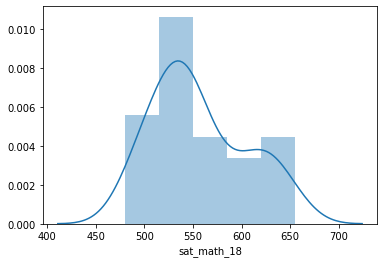

In [149]:
sns.distplot(final_2017_2018.sat_math_18);

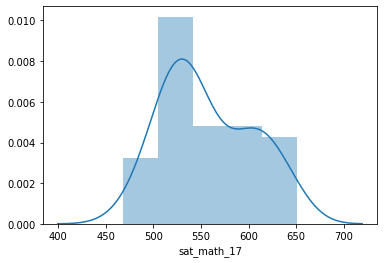

In [150]:
sns.distplot(final_2017_2018.sat_math_17);

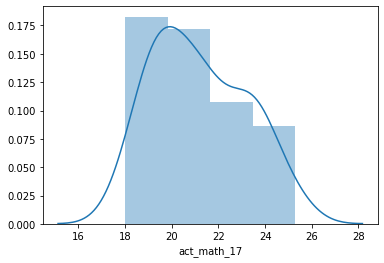

In [151]:
sns.distplot(final_2017_2018.act_math_17);


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates

Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [152]:
selection_list_2 = ['sat_participation_18','sat_reading_writing_18','sat_math_18','sat_participation_17','sat_reading_writing_17','sat_math_17','act_participation_18','act_math_18','act_reading_18','act_participation_17','act_math_17','act_reading_17']

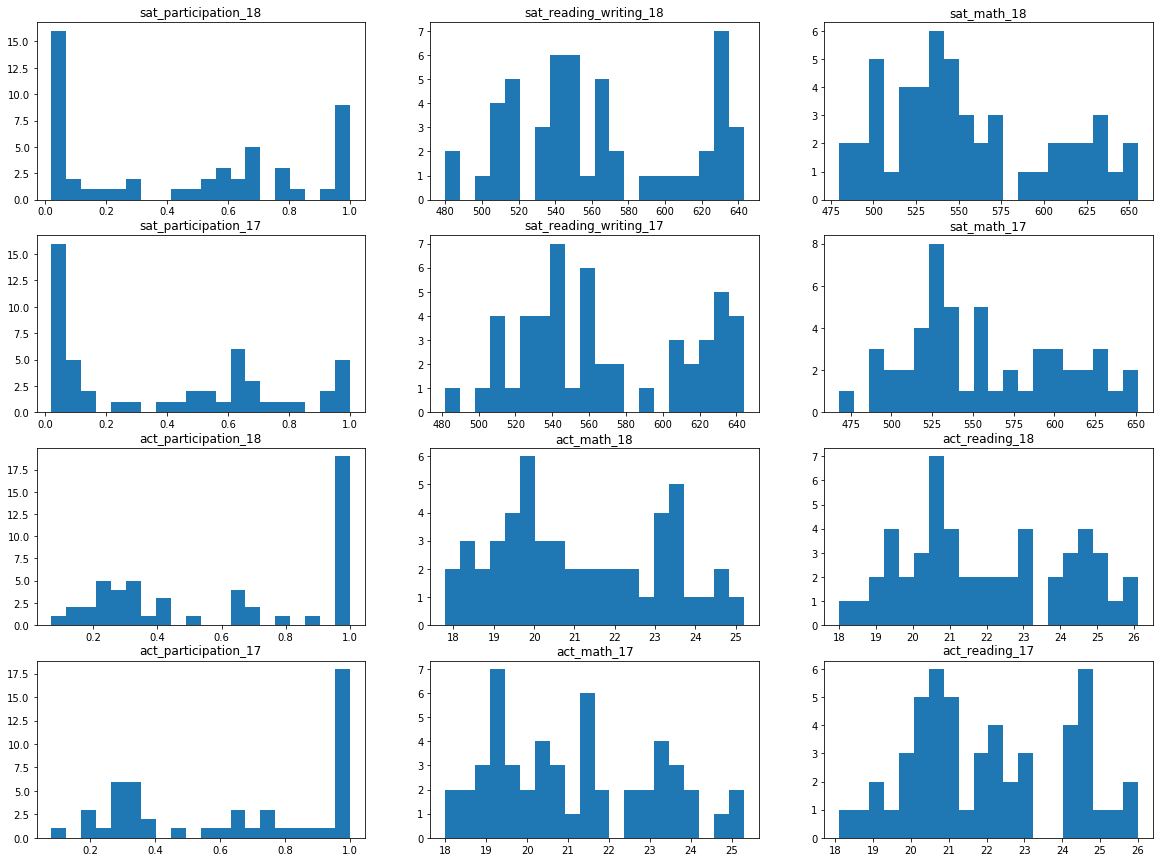

In [153]:
fig = plt.figure(figsize=(20,15))

for i, col in enumerate(selection_list_2):  
    fig.add_subplot(4,3,1+i)  
    col_data = final_2017_2018[col]
    plt.hist(col_data, bins=20)
    #axs[i].axvline(final_2017_2018[column].mean(),c='red',label= str(final_2017_2018[column].mean()))
    plt.title(col)


* As verified above, only Act_English_17, Sat_Math_17, Sat_Math_18 variables are normally distributed

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

<Figure size 720x432 with 0 Axes>

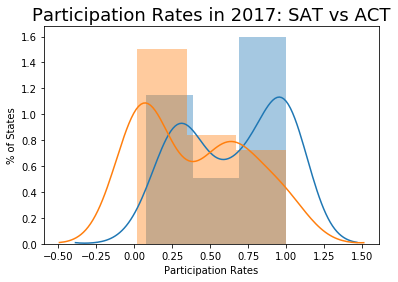

In [154]:
fig = plt.figure(figsize=(10,6))
plt.figure("Participation Rates 2017: SAT vs ACT")
x = pd.Series(final_2017_2018.act_participation_17)
x_2 = pd.Series(final_2017_2018.sat_participation_17)
sns.distplot(x)
sns.distplot(x_2)
plt.title("Participation Rates in 2017: SAT vs ACT", fontsize=18)
plt.xlabel('Participation Rates')
plt.ylabel('% of States');

Answer: 
* On the surface, the sample size of states is 50 (which is >30), hence allowing us to use the sample statistics and then reply on properties of it to make inferences that we can generalize to the general population of the US population.
* Additionally, we have proven that the correlation between the two variables are strong in an inverse relationship

In [155]:
final_2017_2018['act_participation_17'].corr(final_2017_2018['sat_participation_17'])

-0.8412344644539916

* However we cannot use the results to make conducive statements.
* Participation rates are in percentages, and this a larger state will have a lower number than a smaller state in a situation where the number of students are the same. Using this aggregated parameter introduces bias estimates.


##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Answer: 
* Not comparable as both tests are of different standards, and issued by different examination boards. 
* Participation rates of both tests are also different. The sample mean of the math scores are thus based on a different student sizes.
* The scale and scoring system for both tests are also different. The ACT math score is mapped from the raw score to an aggregated score (as shown from <a href="https://www.princetonreview.com/college-advice/act-score-chart#:~:text=Your%20composite%20score%2C%20or%20overall,what%20your%20ACT%20scores%20mean%20." target="_blank">this link</a>, while the SAT score is mapped to a different scale (as shown from <a href="https://blog.prepscholar.com/how-is-the-sat-scored-scoring-charts" target="_blank">this link</a>)
* However, by using ready-available conversion tables that can be found at <a href="https://collegereadiness.collegeboard.org/pdf/guide-2018-act-sat-concordance.pdf" target="_blank">this link</a>, we can gauge the relationship

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

* Missing a control group to do proper hypothesis testing

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The SAT College Board may consider these 3 states based on the following reasoning:

1. [States who have huge increase in SAT participation](#States-that-have-increased-in-participation-the-most): Illinois
2. [States who have a huge decrease in SAT participation](#States-that-have-dropped-out-from-SAT-the-most): Florida
3. [States who have a low participation in both SAT and ACT participation](#4.-Significant-Changes-in-ACT-Participation,-2017-18): Alaska

#### Illinois

* Illinois mandated SAT participation across the state for High School Juniors in 2017. 
* SAT is now state-funded and free of charge to high school juniors
> "...a new law took effect that required a college entrance exam to be included in the state testing cycle. But now, that exam will be the SAT, which will get a big boost in test participation under the College Board's new contract with Illinois"<br><br>
>Source: <a href="https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html" target="_blank">Chicago Tribune</a>

#### Florida

While further investigating Florida's case study, it appears that the participation rate in percentages disguised the absolute increase in total students taking the rest. From 2017-2018, there has been around 29,000 more teens who took the SAT test. <a href="https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html" target="_blank">(link A</a>:176,746 in 2018, <a href="https://reports.collegeboard.org/pdf/2017-florida-sat-suite-assessments-annual-report.pdf" target="_blank">(link B</a>:147,058 in 2017)

Nonetheless, we can still use Florida's case study to tease out learning points for understanding SAT's growing popularity:
* Florida schools offered free SAT “school day” events, where teens can take the exam during a regular school day with the cost covered by their schools, not their parents. 
* SAT partnership with the Khan Academy gave free, online SAT review lessons and practice tests. These proved a good resource and also helped make the SAT the more popular exam.
> Source: <a href="https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html" target="_blank">Orlando Sentinel</a><br>
> Source: <a href="https://www.floridaphoenix.com/blog/florida-scores-drop-on-the-sat-most-teens-tested-not-ready-for-college-classes/" target="_blank">Florida Phoenix</a><br>
> Source: <a href="https://reports.collegeboard.org/pdf/2018-florida-sat-suite-assessments-annual-report.pdf" target="_blank">College Board Report 2018</a><br>
> Source: <a href="https://reports.collegeboard.org/pdf/2017-florida-sat-suite-assessments-annual-report.pdf" target="_blank">College Board Report 2017</a>

#### Alaska

* Alaska's low participation in both SAT and ACT is due to the state's requirement for another test "Performance Evaluation for Alaska's Schools (PEAKS)" instead
* Alaska's PEAKS test function like a SAT/ACT format where variety of subjects are offered
> Source: <a href="https://www.edweek.org/ew/section/multimedia/what-tests-did-each-state-require-2016-17.html" target="_blank">Edweek (2017)</a><br>
> Source: <a href="https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html" target="_blank">Edweek (2018)</a>

## Conclusions and Recommendations

### Key Takeaways

#### 1. Need to increase/Maintain high participation rate from high participating states

Although these states are usually states that have mandated compulsory participation for the SAT, states might consider other entrance exams if they continually achieve low total average scores. (As noted from our observation that states with high participation are usually penalized with lower, if not lowest average scores). Thus, College Board should also be concerned about increasing the average scores from these states.

Here are some ways:
* College Board can strike more partnerships with online education academys to give free review lessons and tests to better prepare students for SAT tests, and give confidence in scoring well.
* Similar to Florida, free "SAT" days of state-funded/school-funded tests on weekdays can be implemented

#### 2. Work with states that has low participation rates in both ACT and SAT, to advocate SAT global recognition 

There might be more states like Alaska that implements state-specific entrance tests. College Board can strike partnerships with colleges (both local and overseas) with such high-schools to exemplify the broad connection and recognition of SAT tests.

### Case Study: Alaska (State of Choice)

* Introduce a SAT Free Day, with partnerships with online academy courses
* Stir ambition to enter more prestigous colleges in USA, outside of Alaska. Advocate SAT participation as a way into these colleges

More information for this will help to frame our understanding 
1. Student's perception on SAT vs PEAK <br>(feedback on perception and differences between the two tests)
2. Alaska's socio-economic status <br>(Economy of state, lack of variety in jobs offered within the state might limit a student ambition to take further education tests)
3. Median household income in Alaska <br>(Cost of exam could be a barrier)